# Subclustering of head ectoderm in Set 3

In [1]:
# loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
#loading data
seu_HQC <- readRDS(file = "../../data/seurat_object/Set3/seu_HQC_Set3.obj")

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


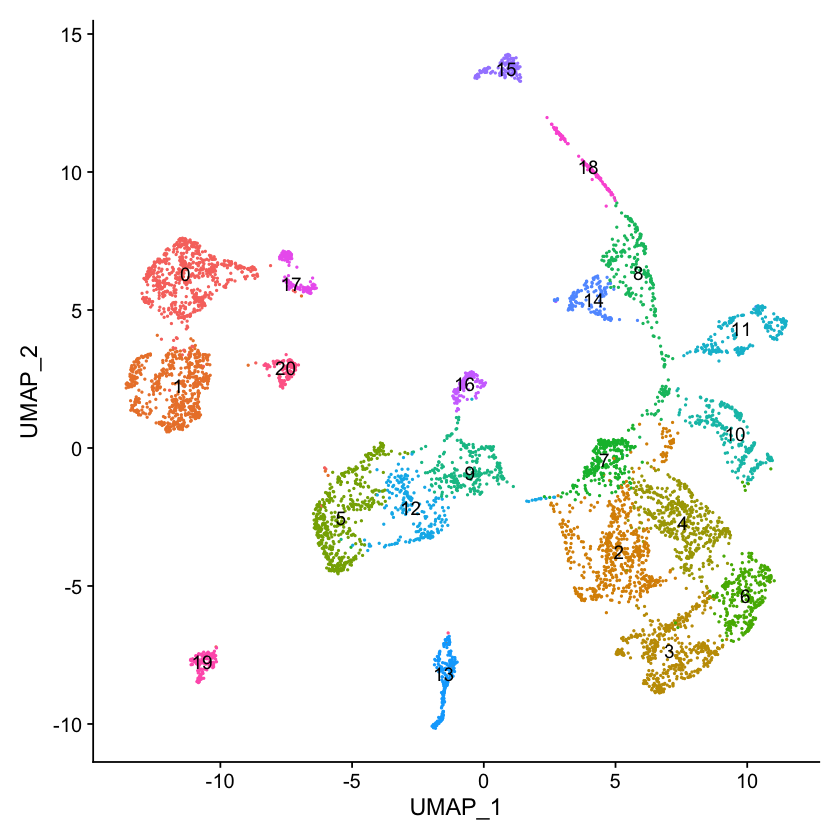

In [4]:
DimPlot(seu_HQC, reduction =  "umap", label = TRUE) + NoLegend()

## Picking up target clusters

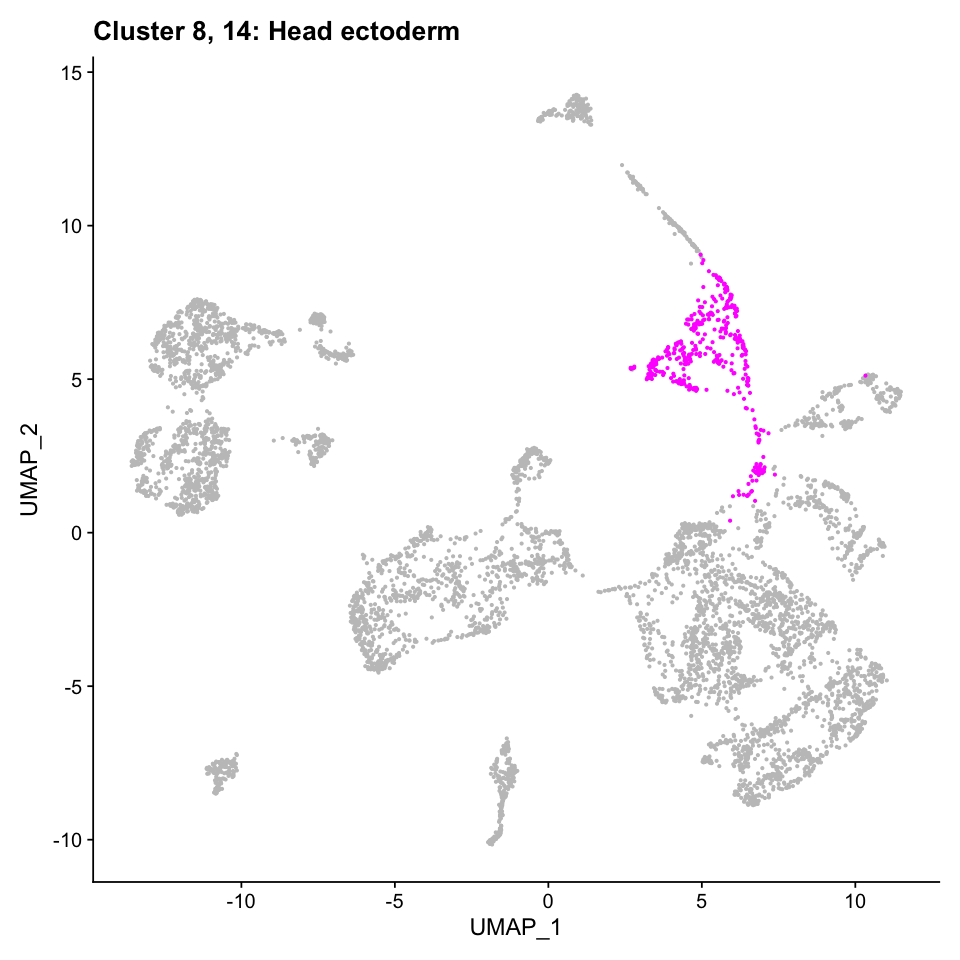

In [5]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(8,14))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Cluster 8, 14: Head ectoderm')

In [6]:
seu_HQC_head <- subset(seu_HQC, ident = c("8", "14"))
seu_HQC_head

An object of class Seurat 
28756 features across 395 samples within 2 assays 
Active assay: SCT (11250 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [7]:
seu_HQC_head$allcell_clusters <- Idents(object = seu_HQC_head)

## Clustering
Num of cells < 500  
Skipping re-normalize

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


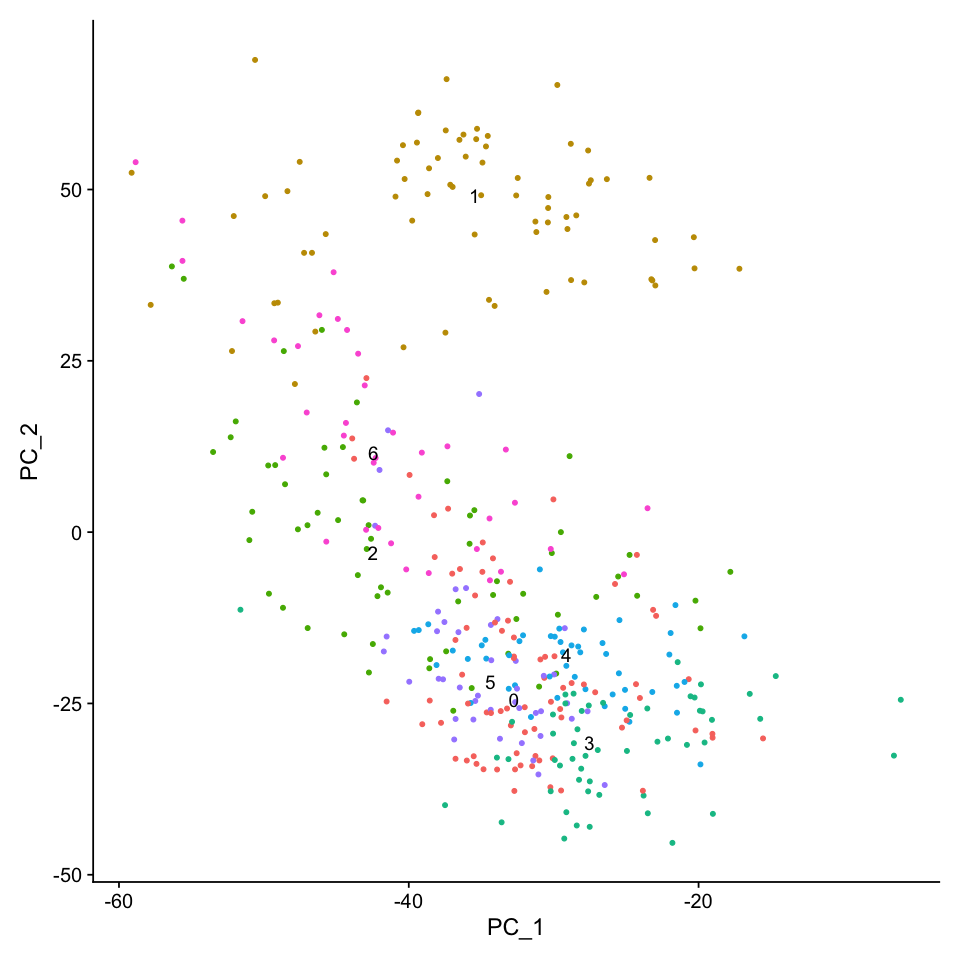

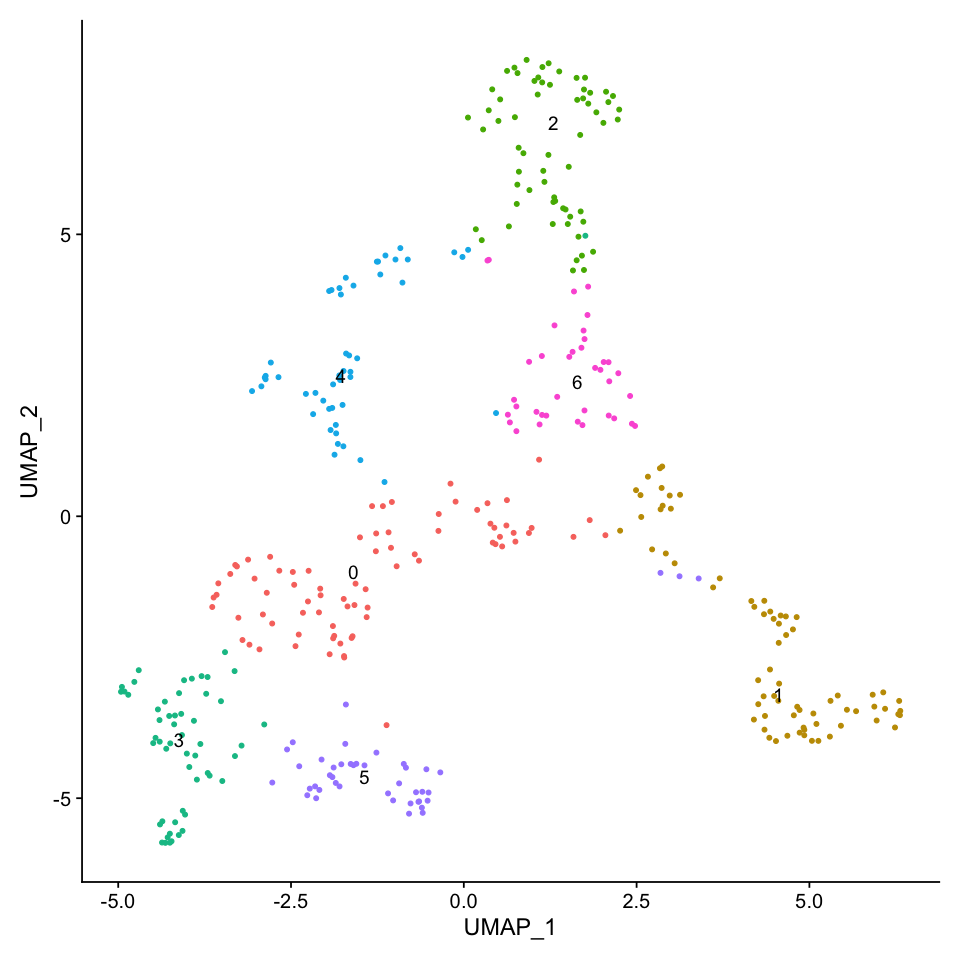

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_head <- RunPCA(seu_HQC_head, verbose = FALSE)
seu_HQC_head <- RunUMAP(seu_HQC_head, dims = 1:30, verbose = FALSE, n.neighbors = 20L)
seu_HQC_head <- FindNeighbors(seu_HQC_head, dims = 1:30, verbose = FALSE)
seu_HQC_head <- FindClusters(seu_HQC_head, verbose = FALSE)
DimPlot(seu_HQC_head, reduction =  "pca", label = TRUE) + NoLegend()
DimPlot(seu_HQC_head, reduction =  "umap", label = TRUE) + NoLegend()

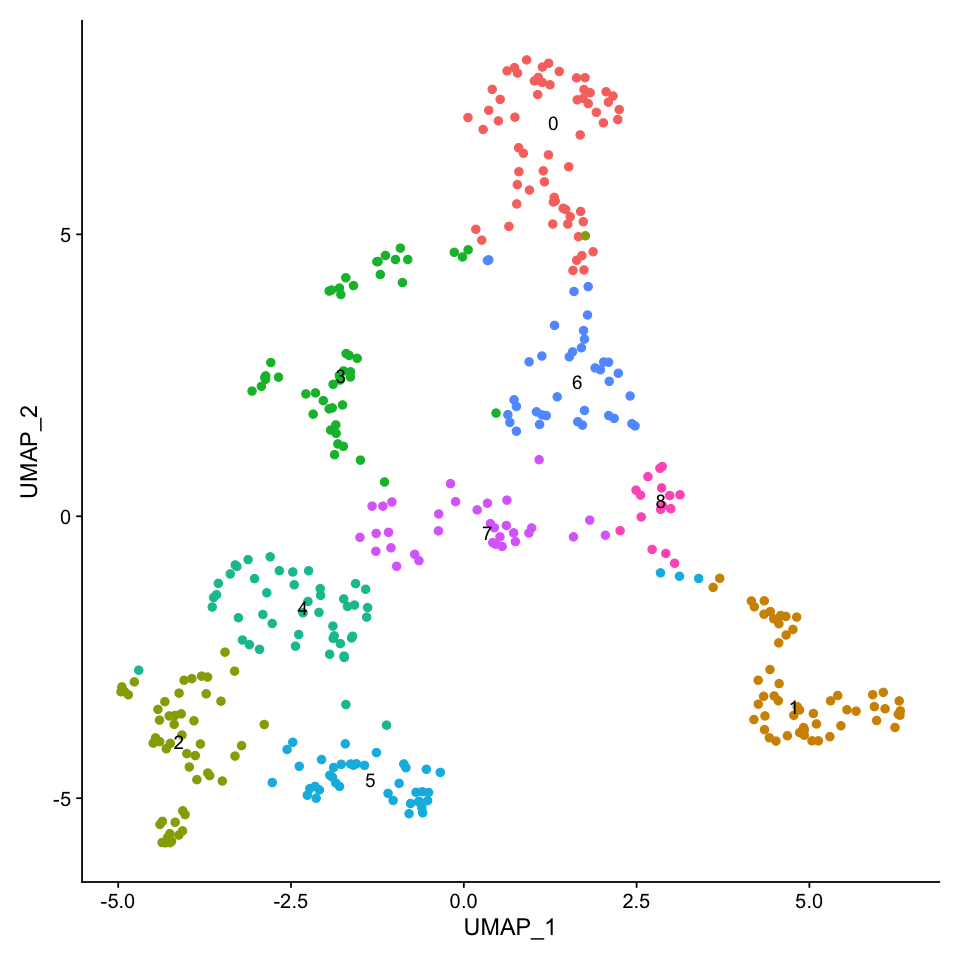

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_head <- FindClusters(seu_HQC_head, verbose = FALSE, resolution = 1.4)
DimPlot(seu_HQC_head, reduction =  "umap", label = TRUE, pt.size=2) + NoLegend()

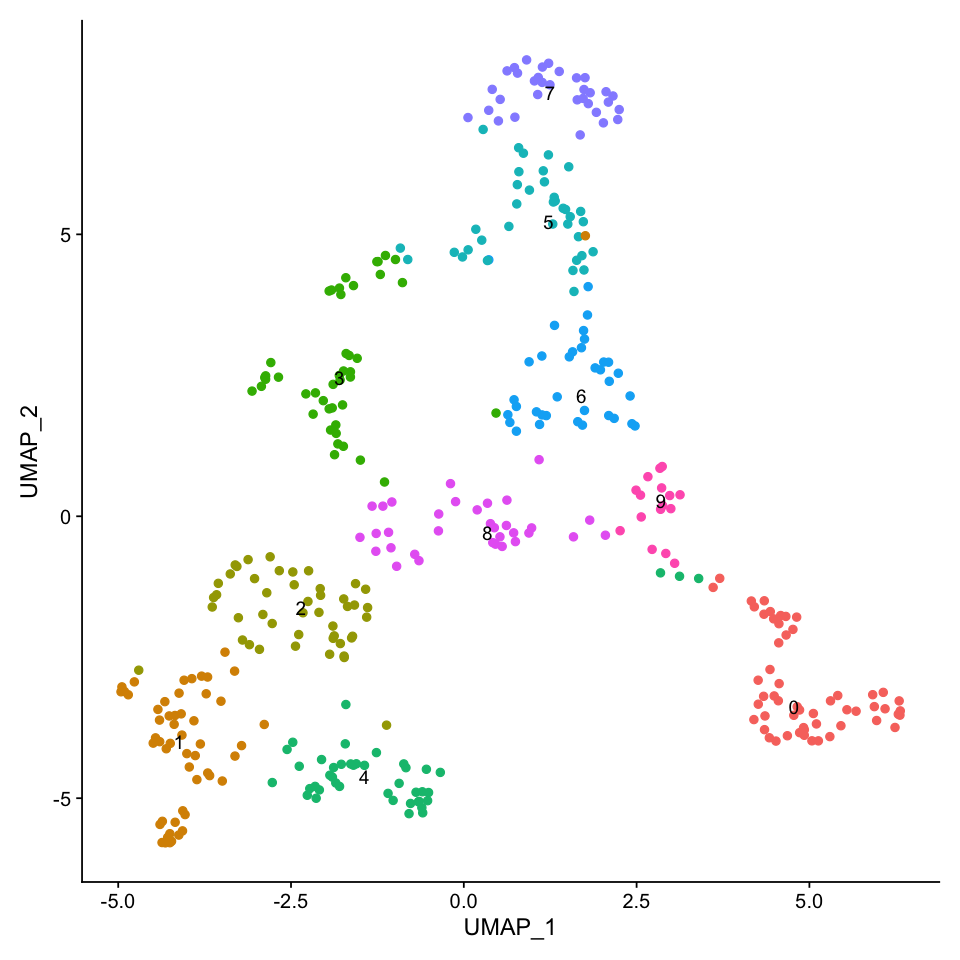

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_head <- FindClusters(seu_HQC_head, verbose = FALSE, resolution = 1.6)
DimPlot(seu_HQC_head, reduction =  "umap", label = TRUE, pt.size=2) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 395
Number of edges: 10095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3611
Number of communities: 19
Elapsed time: 0 seconds


1 singletons identified. 18 final clusters.



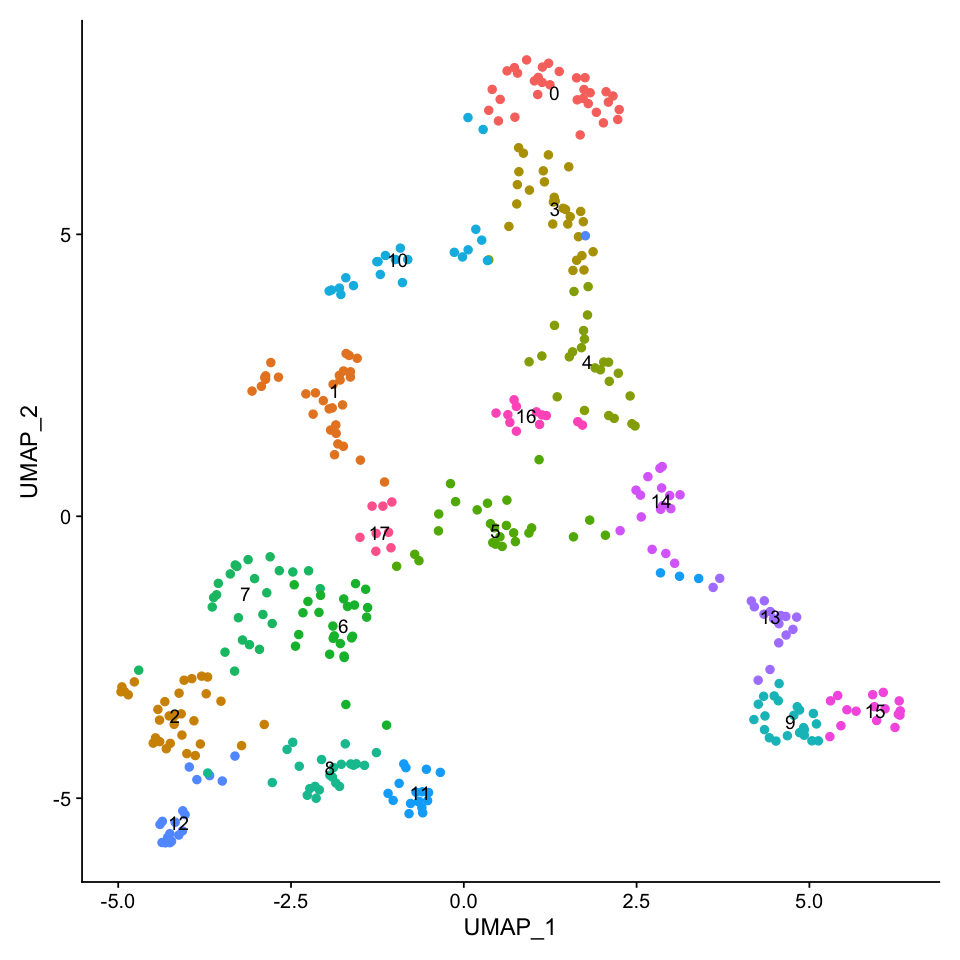

In [11]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_head <- FindClusters(seu_HQC_head, resolution = 4.8)
DimPlot(seu_HQC_head, reduction =  "umap", label = TRUE, pt.size=2) + NoLegend()

Calculating cluster 15

Calculating cluster 9

Calculating cluster 13

Calculating cluster 11

Calculating cluster 8

Calculating cluster 12

Calculating cluster 2

Calculating cluster 6

Calculating cluster 7

Calculating cluster 14

Calculating cluster 5

Calculating cluster 17

Calculating cluster 4

Calculating cluster 16

Calculating cluster 1

Calculating cluster 10

Calculating cluster 3

Calculating cluster 0



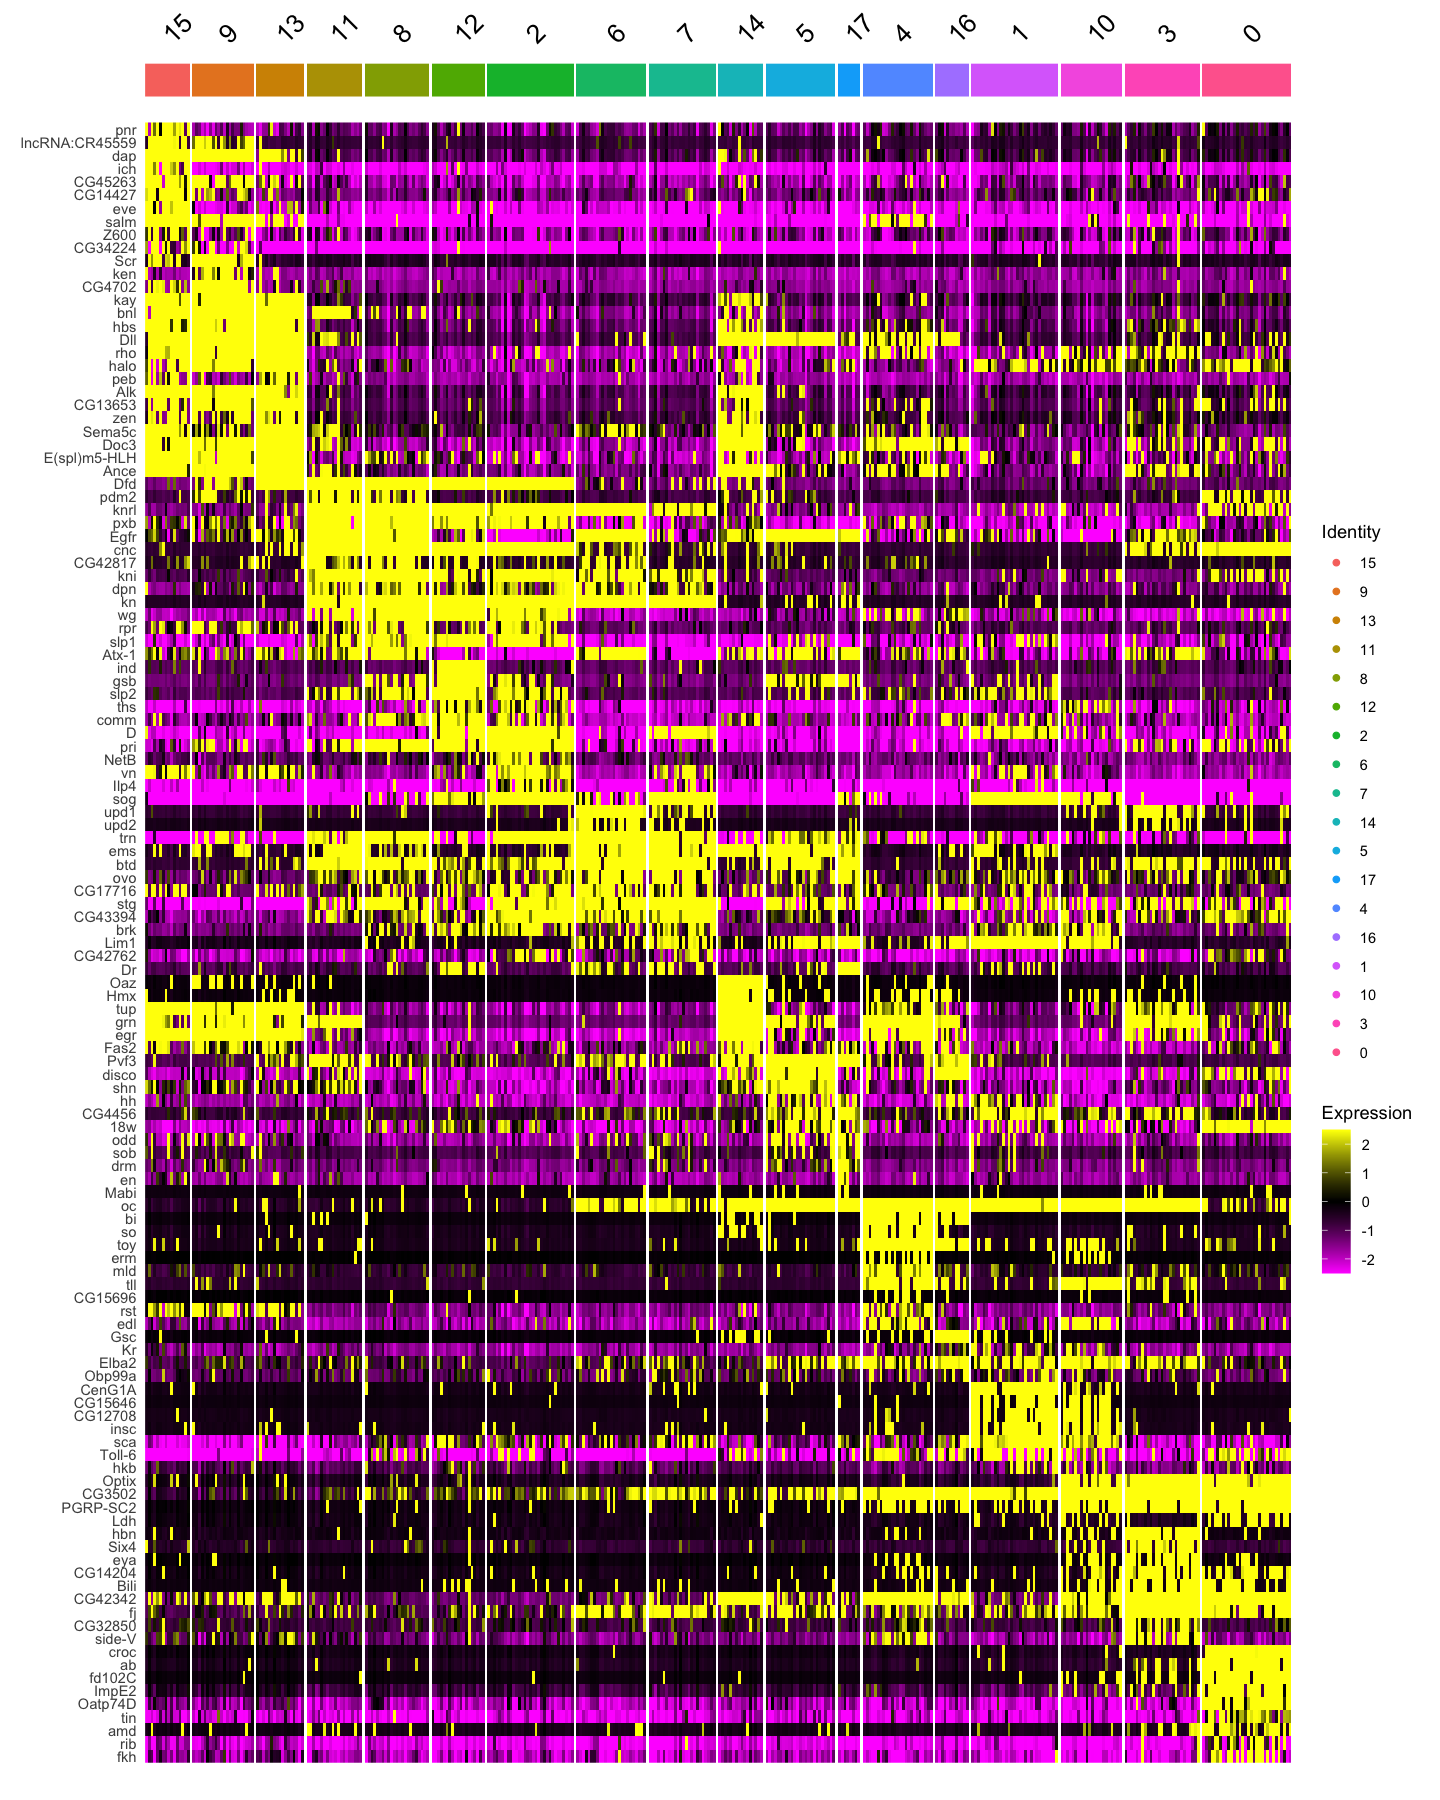

In [12]:
levels <- c(15,9,13,11,8,12,2,6,7,14,5,17,4,16,1,10,3,0)
levels(seu_HQC_head) <- levels
all.markers.head <- FindAllMarkers(object = seu_HQC_head, only.pos = TRUE)
all.markers.head.top10 <- all.markers.head %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
options(repr.plot.width=12, repr.plot.height=15)
DoHeatmap(seu_HQC_head, features = c(all.markers.head.top10$gene))

In [13]:
write.table(all.markers.head, file = './subcluster_markers/markers_head.txt', sep = '\t')

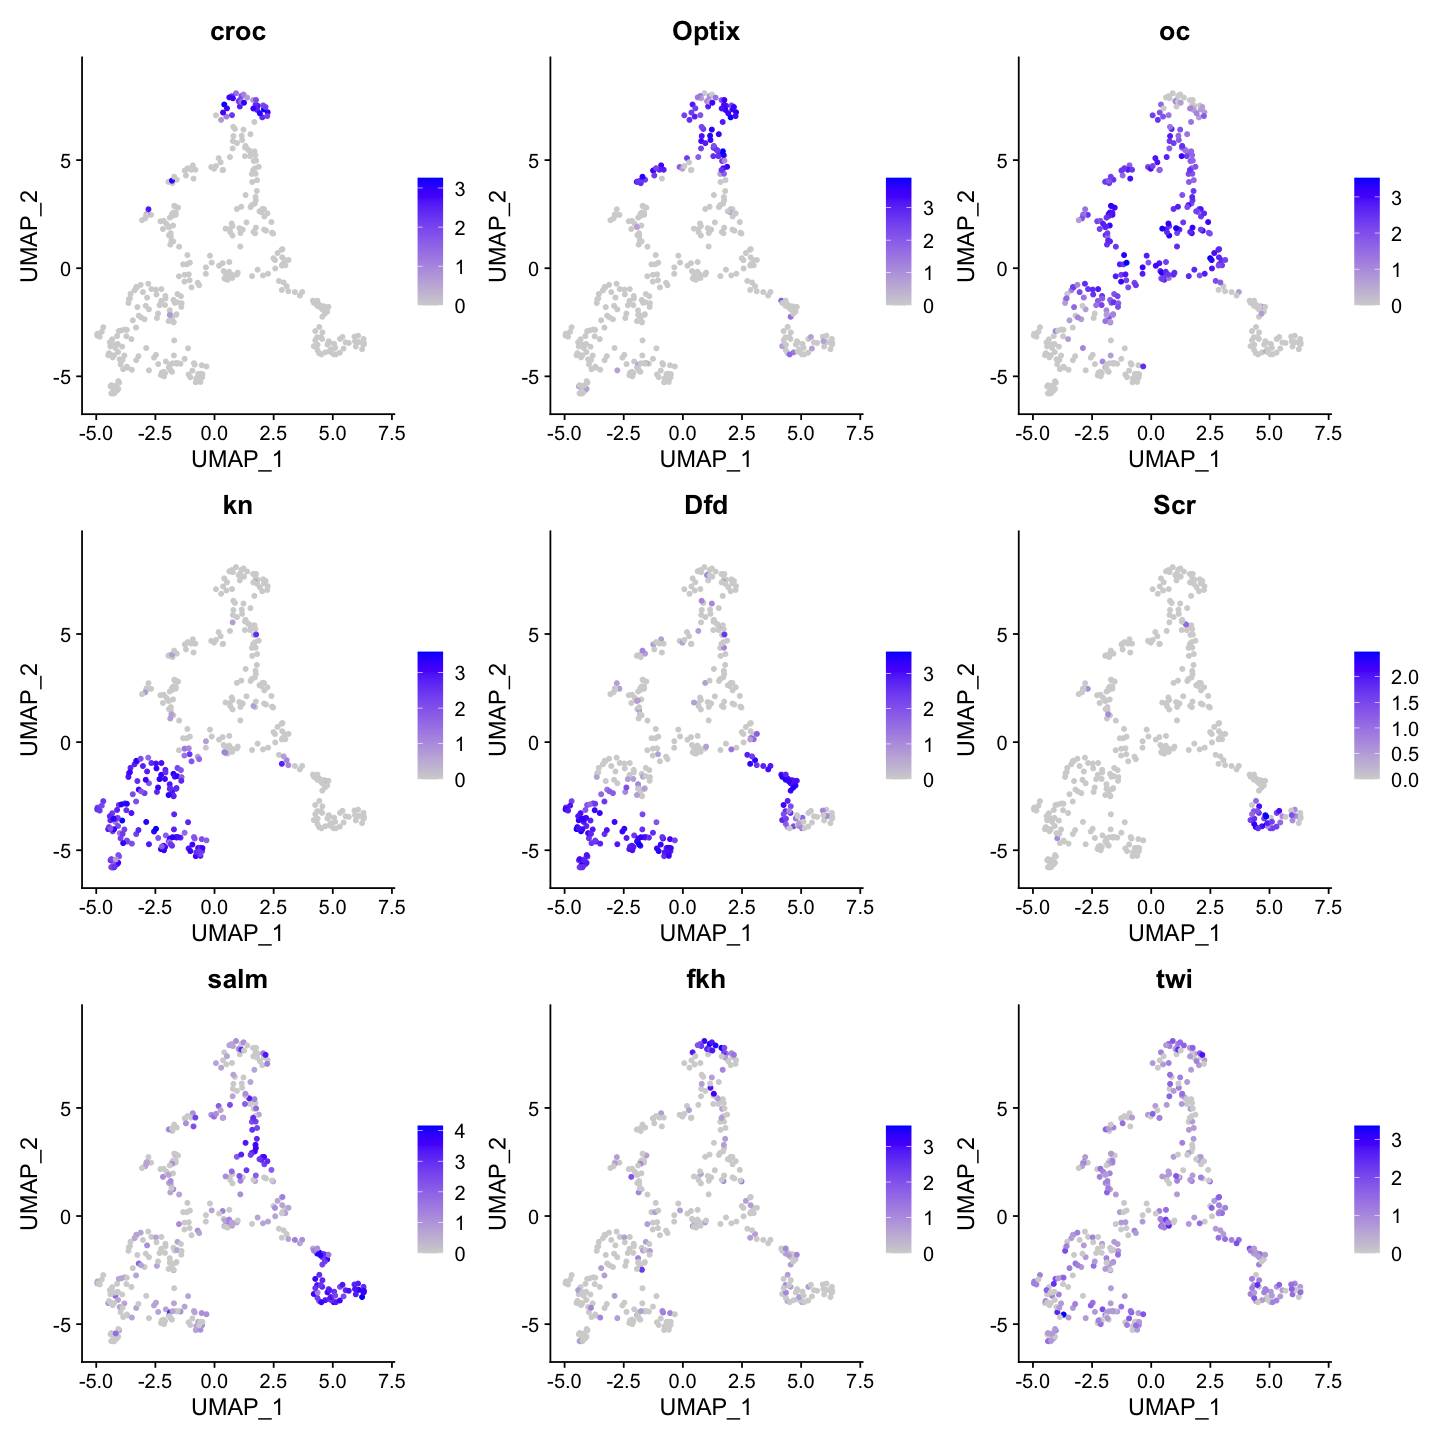

In [14]:
options(repr.plot.width=12, repr.plot.height=12)
FeaturePlot(seu_HQC_head, reduction = "umap", features = c("croc","Optix","oc","kn","Dfd","Scr","salm","fkh","twi"), 
            pt.size = 1,  ncol = 3)

cluster 0, 3, 10: Optix+  
cluster 4,16,1,14,5,17: oc+, Optix-, kn-  
cluster 7,6: Dfd-, kn+  
cluster 2,12,8,11: Dfd+, kn+, salm- --> PS0  
cluster 13: Dfd+, salm+, oc- --> PS1  
cluster 9: Scr+, salm+ --> PS2  
cluster 15: salm+, Dfd-, Scr- -->PS3

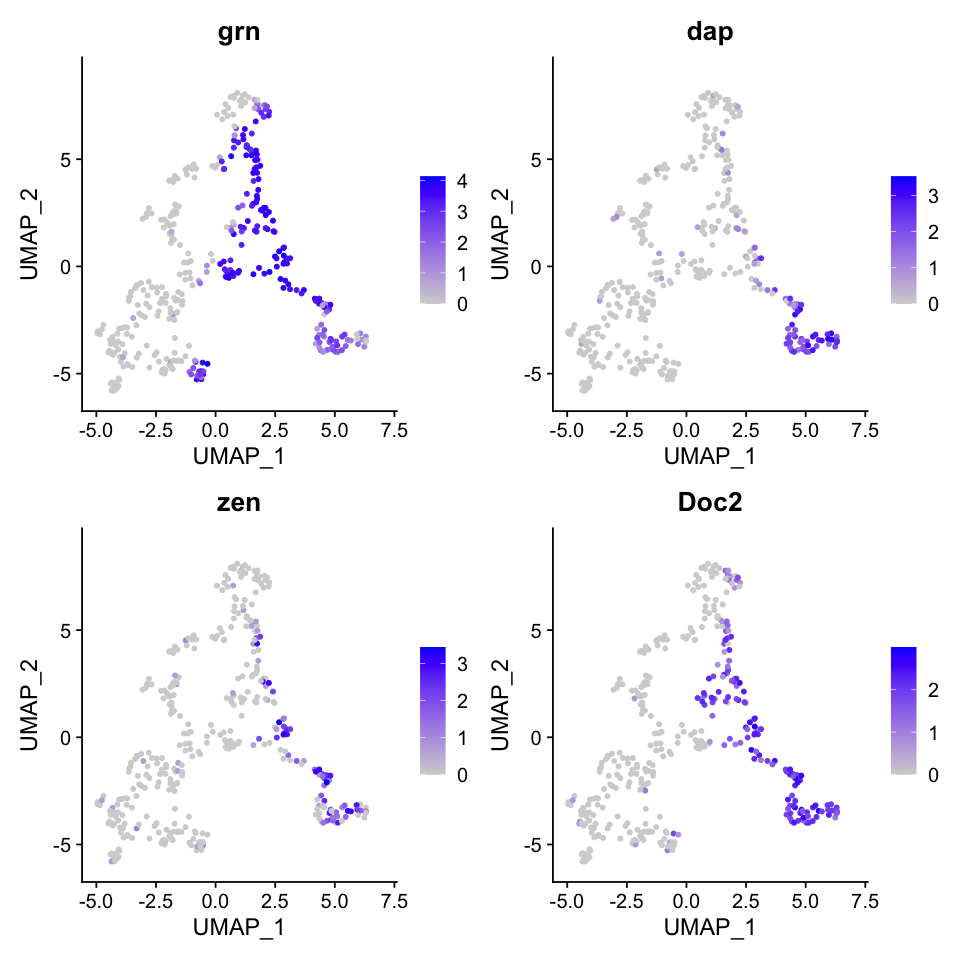

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_head, reduction = "umap", features = c("grn","dap","zen","Doc2"), 
            pt.size = 1,  ncol = 2)

cluster 13, 9, 15: dap+, zen+ --> amnioserosa

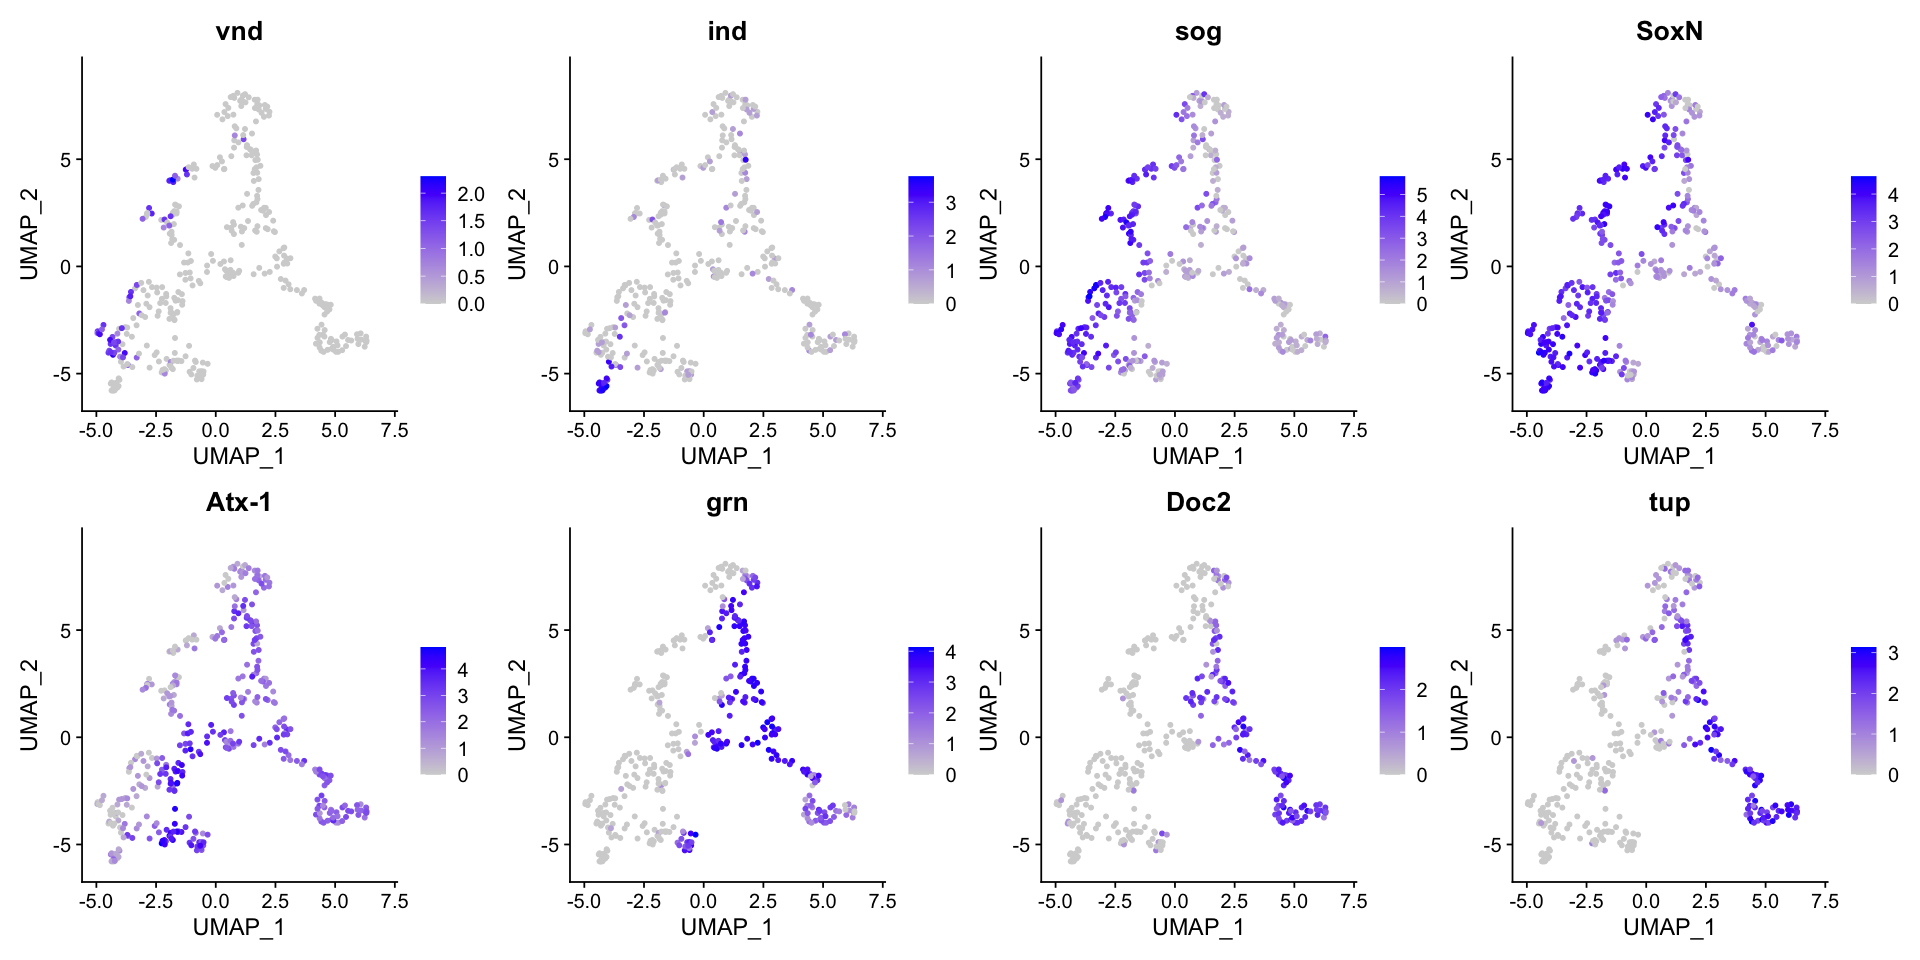

In [16]:
#DV-marker genes
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(seu_HQC_head, reduction = "umap", features = c("vnd", "ind","sog", "SoxN",
                                                           "Atx-1", "grn", "Doc2","tup"), pt.size = 1,  ncol = 4)

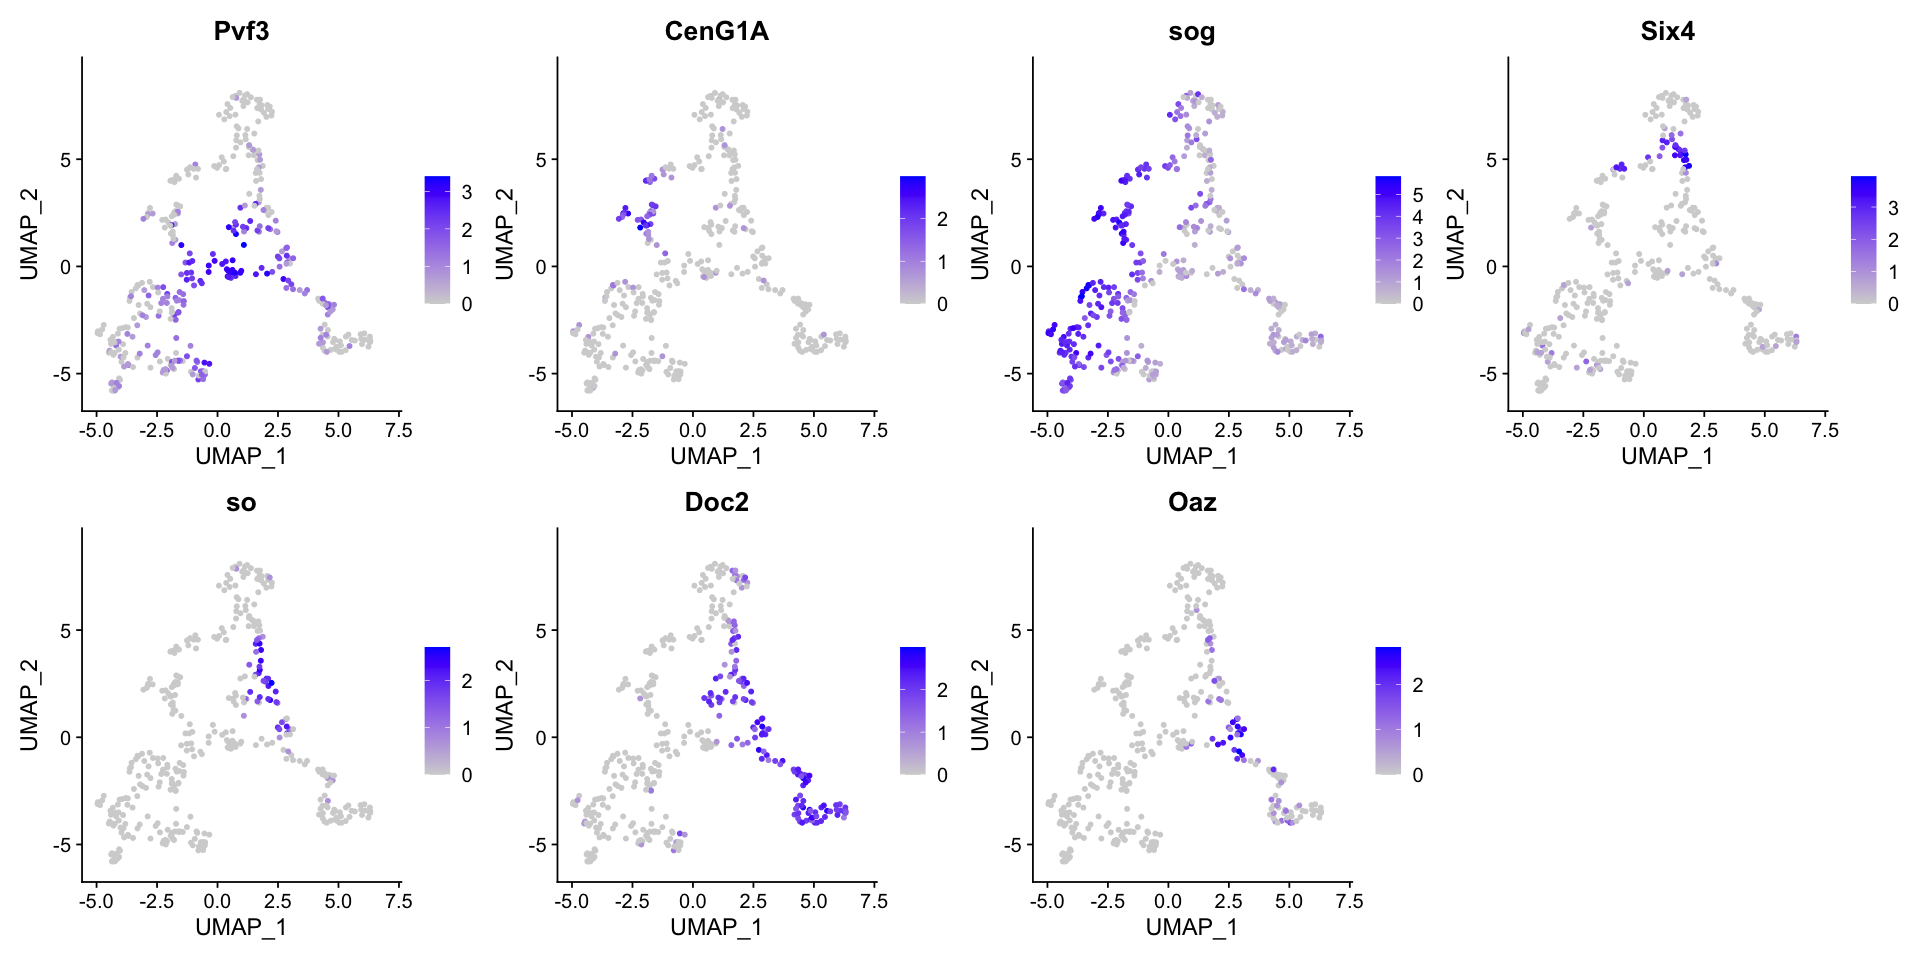

In [17]:
#other marker genes
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(seu_HQC_head, reduction = "umap", features = c("Pvf3", "CenG1A","sog", "Six4", "so", "Doc2", "Oaz"), 
            pt.size = 1,  ncol = 4)

## Add annotation

In [18]:
manual_ID <- as.data.frame(seu_HQC_head$seurat_clusters)
colnames(manual_ID) <- c('manual_ID')
head(manual_ID)

manual_ID$manual_ID <- dplyr::recode(manual_ID$manual_ID,
                                        "0" = "ectoderm_head_croc",
                                        "1" = "ectoderm_head_oc_CenG1A",
                                        "2" = "ectoderm_medial_NE_PS0", #sog+, vnd+
                                        "3" = "ectoderm_head_Optix_Six4",
                                        "4" = "ectoderm_head_oc_so", #so+, Doc2+, SoxN-
                                        "5" = "ectoderm_head_oc_Pvf3_medial", #grn+
                                        "6" = "ectoderm_head_kn_lateral", #sog-, Atx-1+
                                        "7" = "ectoderm_head_kn_medial", #sog+, Atx-1-
                                        "8" = "ectoderm_lateral_NE_PS0", #SoxN+, grn-
                                        "9" = "amnioserosa_PS2",
                                        "10" = "ectoderm_head_Optix_sog",
                                        "11" = "ectoderm_DE_PS0", #SoxN-, grn+
                                        "12" = "ectoderm_intermediate_NE_PS0", #sog+, ind+
                                        "13" = "amnioserosa_PS1",
                                        "14" = "ectoderm_head_oc_Oaz",
                                        "15" = "amnioserosa_PS3",
                                        "16" = "ectoderm_head_oc_Doc2", #so-, Doc2+, SoxN+
                                        "17" = "ectoderm_head_oc_Pvf3_lateral" #grn-, Atx-1+
                                     )


manual_ID
AAACCCAGTCATAGTC 9        
AAAGAACTCTCCTGCA 3        
AAAGTGAAGAGAAGGT 14       
AACAAAGAGATCACCT 16       
AACAAAGGTACGTGTT 12       
AACACACTCAGCGCAC 1

In [19]:
seu_HQC_head$manual_ID <- manual_ID

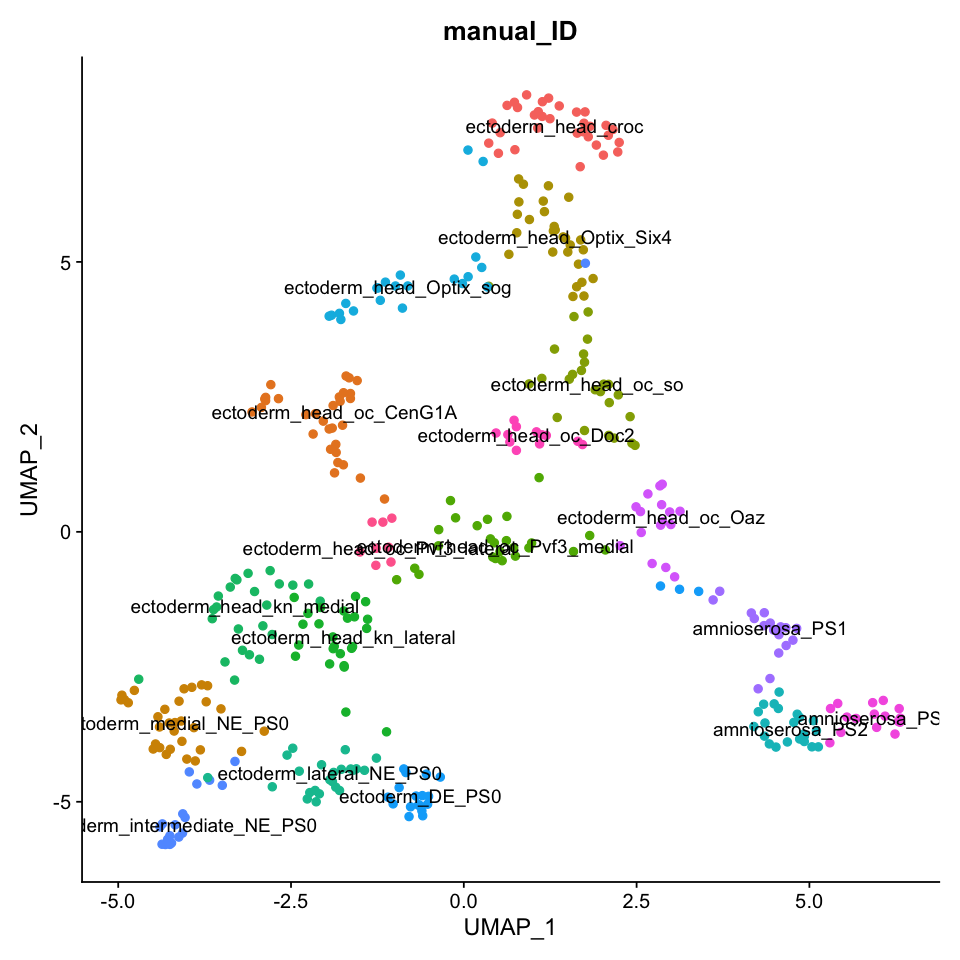

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC_head, reduction =  "umap", group.by = "manual_ID", label = TRUE, pt.size=2) + NoLegend()

In [21]:
write.table(manual_ID, file="./manual_ID_list/seu_HQC_head_manualID.txt",sep="\t",col.names=T,row.names=T,quote=F)

In [22]:
Idents(seu_HQC_head) <- 'manual_ID'
levels(seu_HQC_head) <- c('ectoderm_head_croc','ectoderm_head_Optix_Six4','ectoderm_head_Optix_sog',
                         'ectoderm_head_oc_so','ectoderm_head_oc_Doc2','ectoderm_head_oc_CenG1A',
                          'ectoderm_head_oc_Oaz','ectoderm_head_oc_Pvf3_medial','ectoderm_head_oc_Pvf3_lateral',
                         'ectoderm_head_kn_medial','ectoderm_head_kn_lateral',
                          'ectoderm_DE_PS0','ectoderm_lateral_NE_PS0','ectoderm_intermediate_NE_PS0','ectoderm_medial_NE_PS0',
                         'amnioserosa_PS1','amnioserosa_PS2','amnioserosa_PS3')
all.markers <- FindAllMarkers(seu_HQC_head, only.pos = T)
dim(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster ectoderm_head_croc

Calculating cluster ectoderm_head_Optix_Six4

Calculating cluster ectoderm_head_Optix_sog

Calculating cluster ectoderm_head_oc_so

Calculating cluster ectoderm_head_oc_Doc2

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_oc_Oaz

Calculating cluster ectoderm_head_oc_Pvf3_medial

Calculating cluster ectoderm_head_oc_Pvf3_lateral

Calculating cluster ectoderm_head_kn_medial

Calculating cluster ectoderm_head_kn_lateral

Calculating cluster ectoderm_DE_PS0

Calculating cluster ectoderm_lateral_NE_PS0

Calculating cluster ectoderm_intermediate_NE_PS0

Calculating cluster ectoderm_medial_NE_PS0

Calculating cluster amnioserosa_PS1

Calculating cluster amnioserosa_PS2

Calculating cluster amnioserosa_PS3



[1] 2422    7

Saving 7 x 7 in image



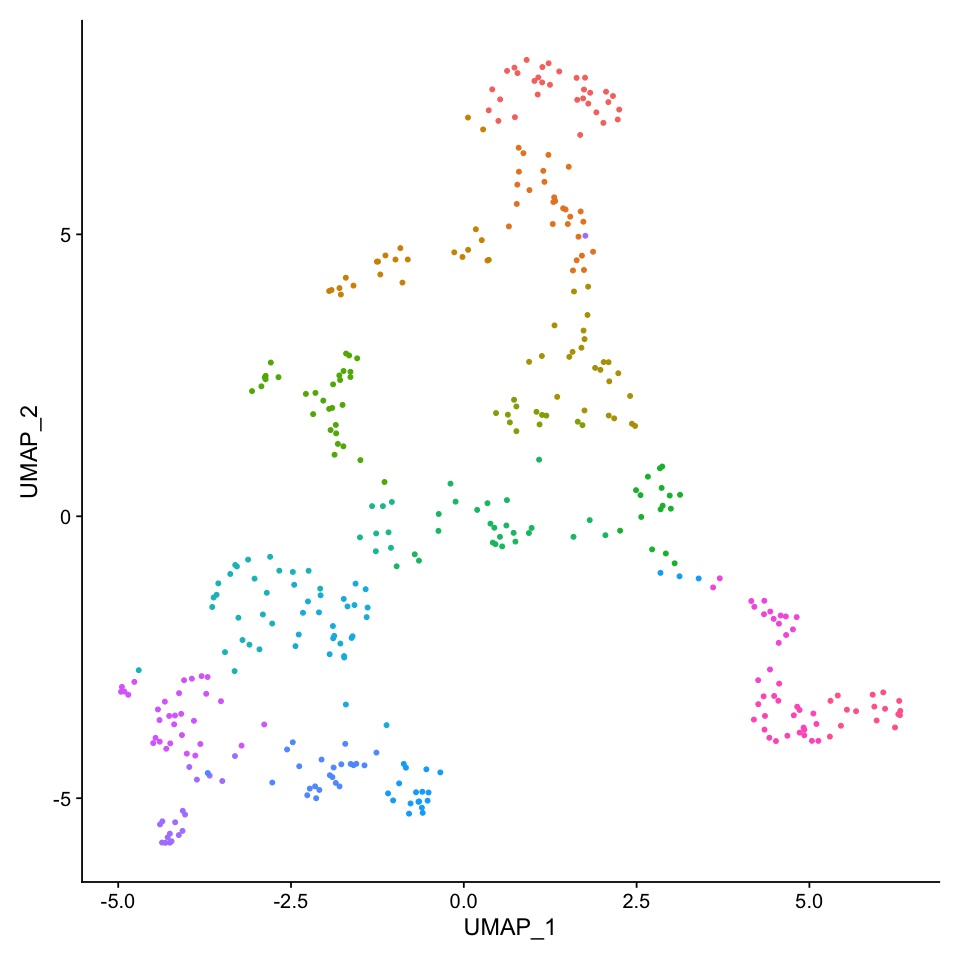

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC_head, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_umap1.eps", dpi = 300)

Saving 7 x 7 in image



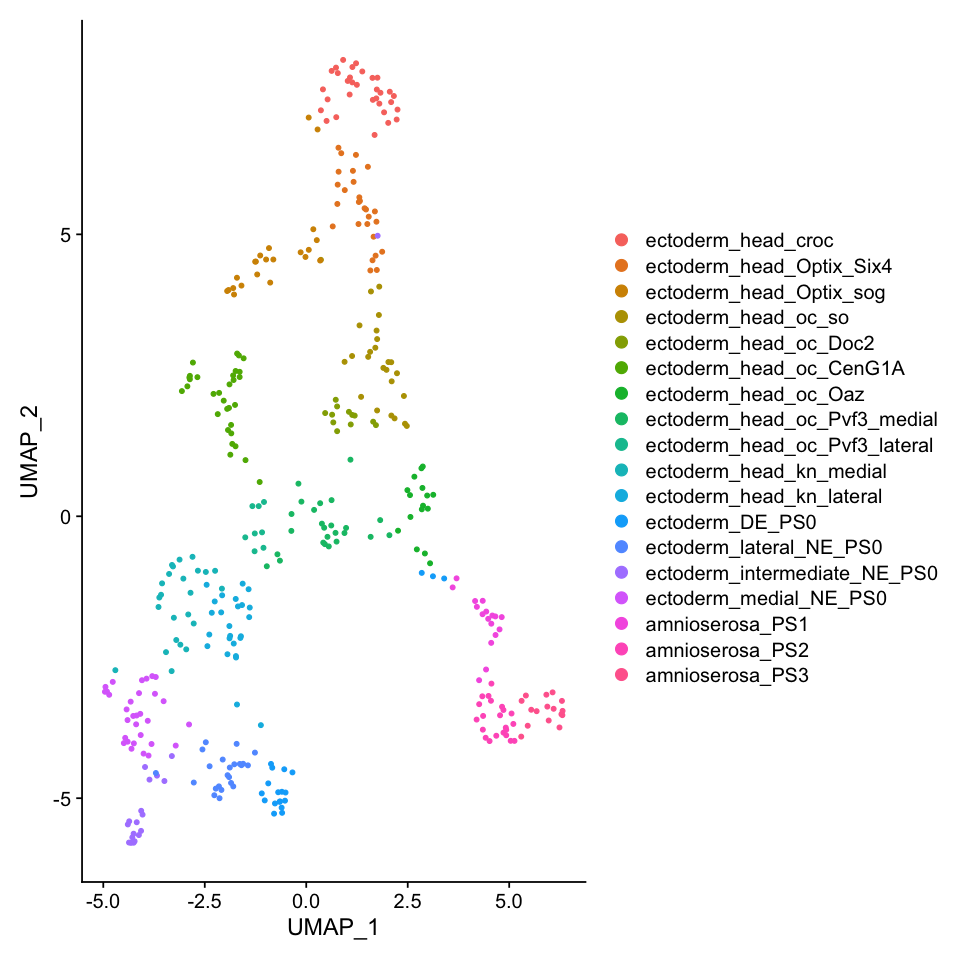

In [24]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC_head, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_umap2.eps", dpi = 300)

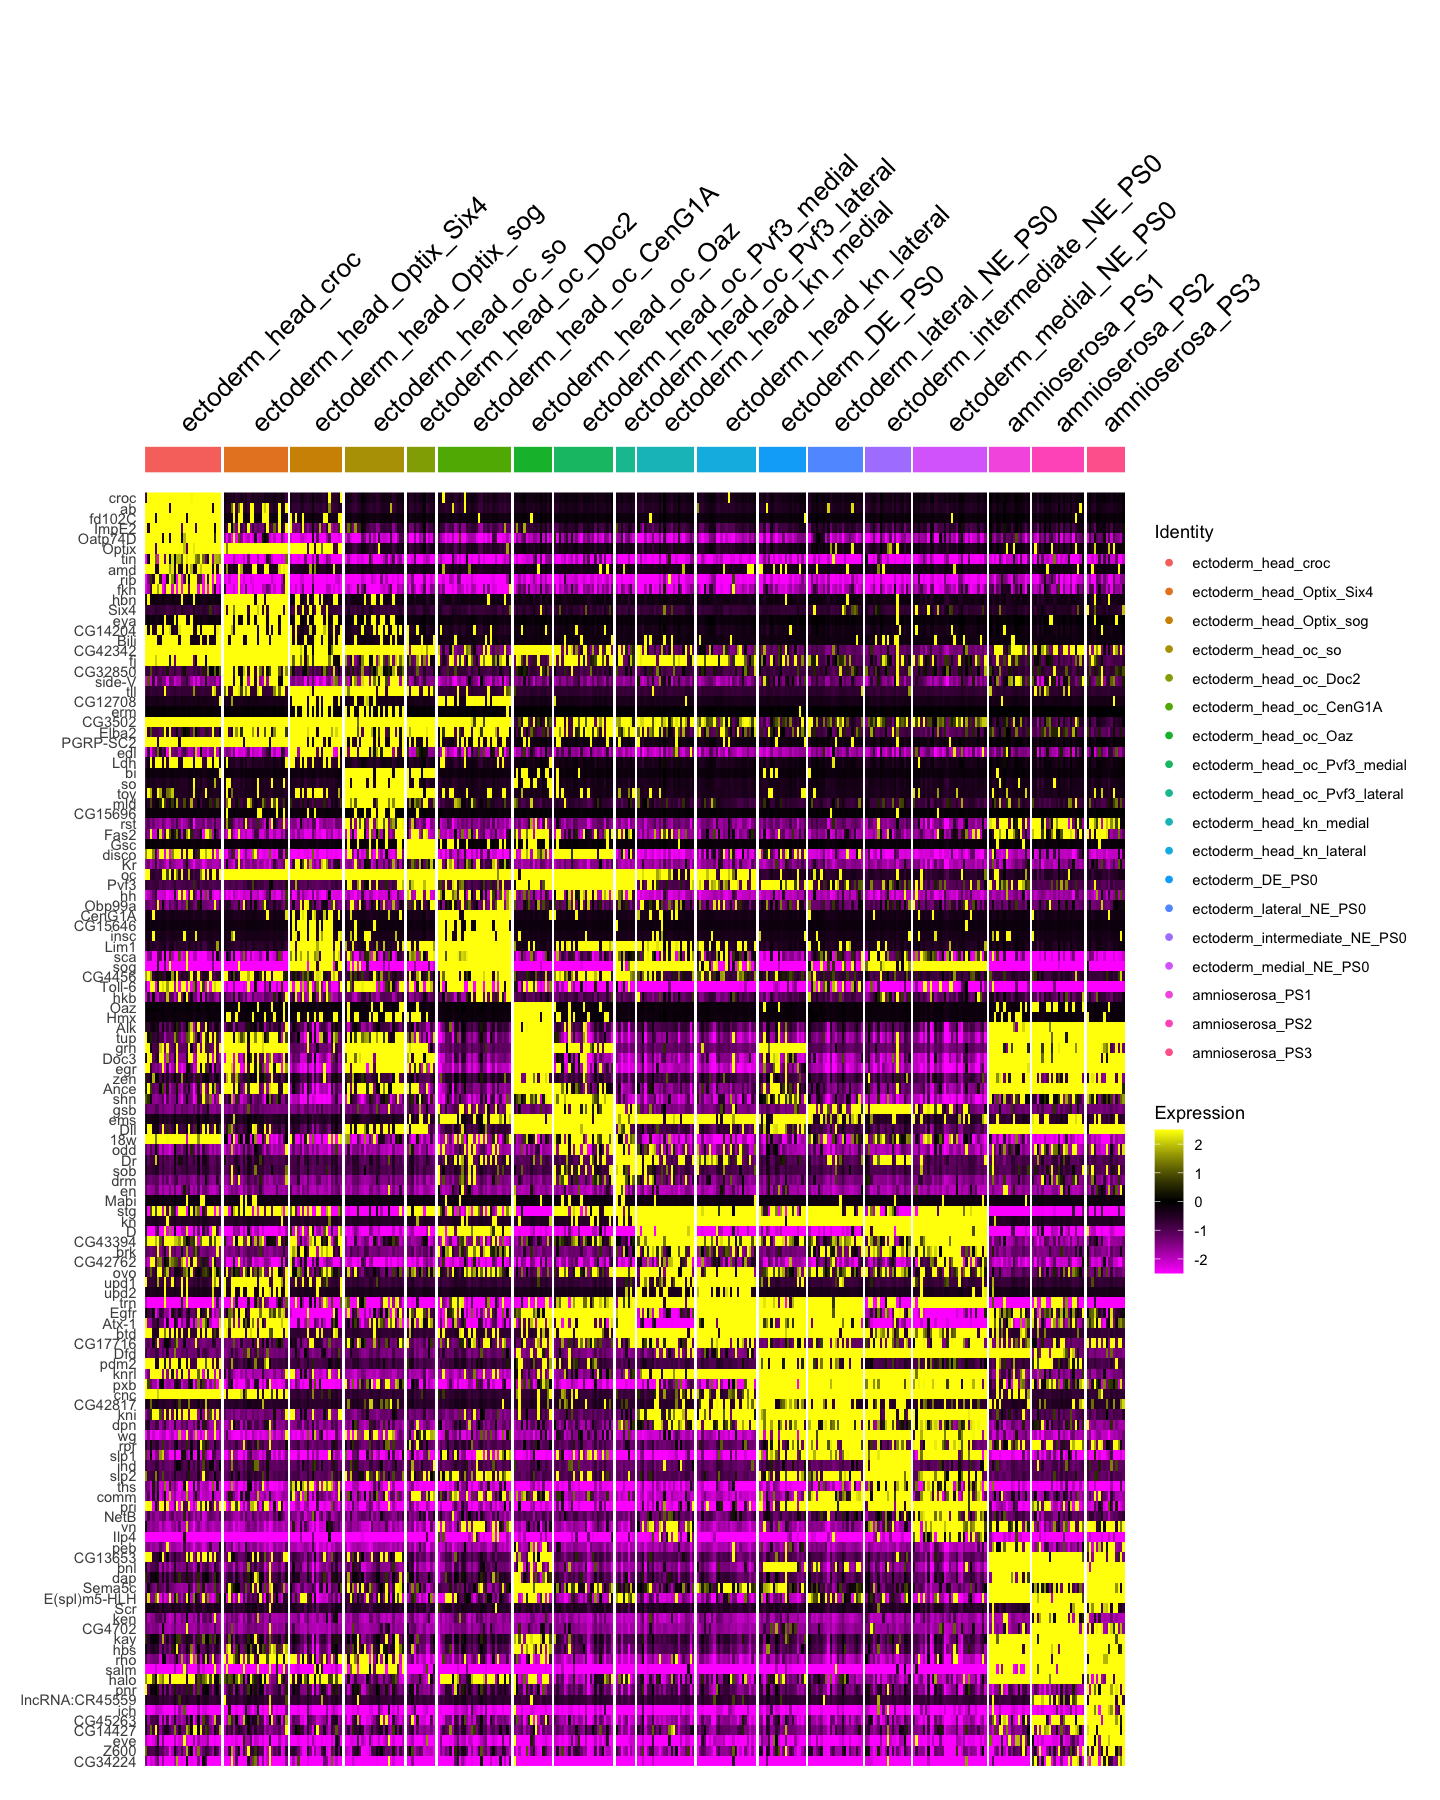

In [25]:
options(repr.plot.width=12, repr.plot.height=15)
fig <- DoHeatmap(seu_HQC_head,  features = c(all.markers.top10$gene))
fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [26]:
all.markers.top5 <- all.markers %>% group_by(cluster) %>% top_n(n = 5, wt = avg_logFC)

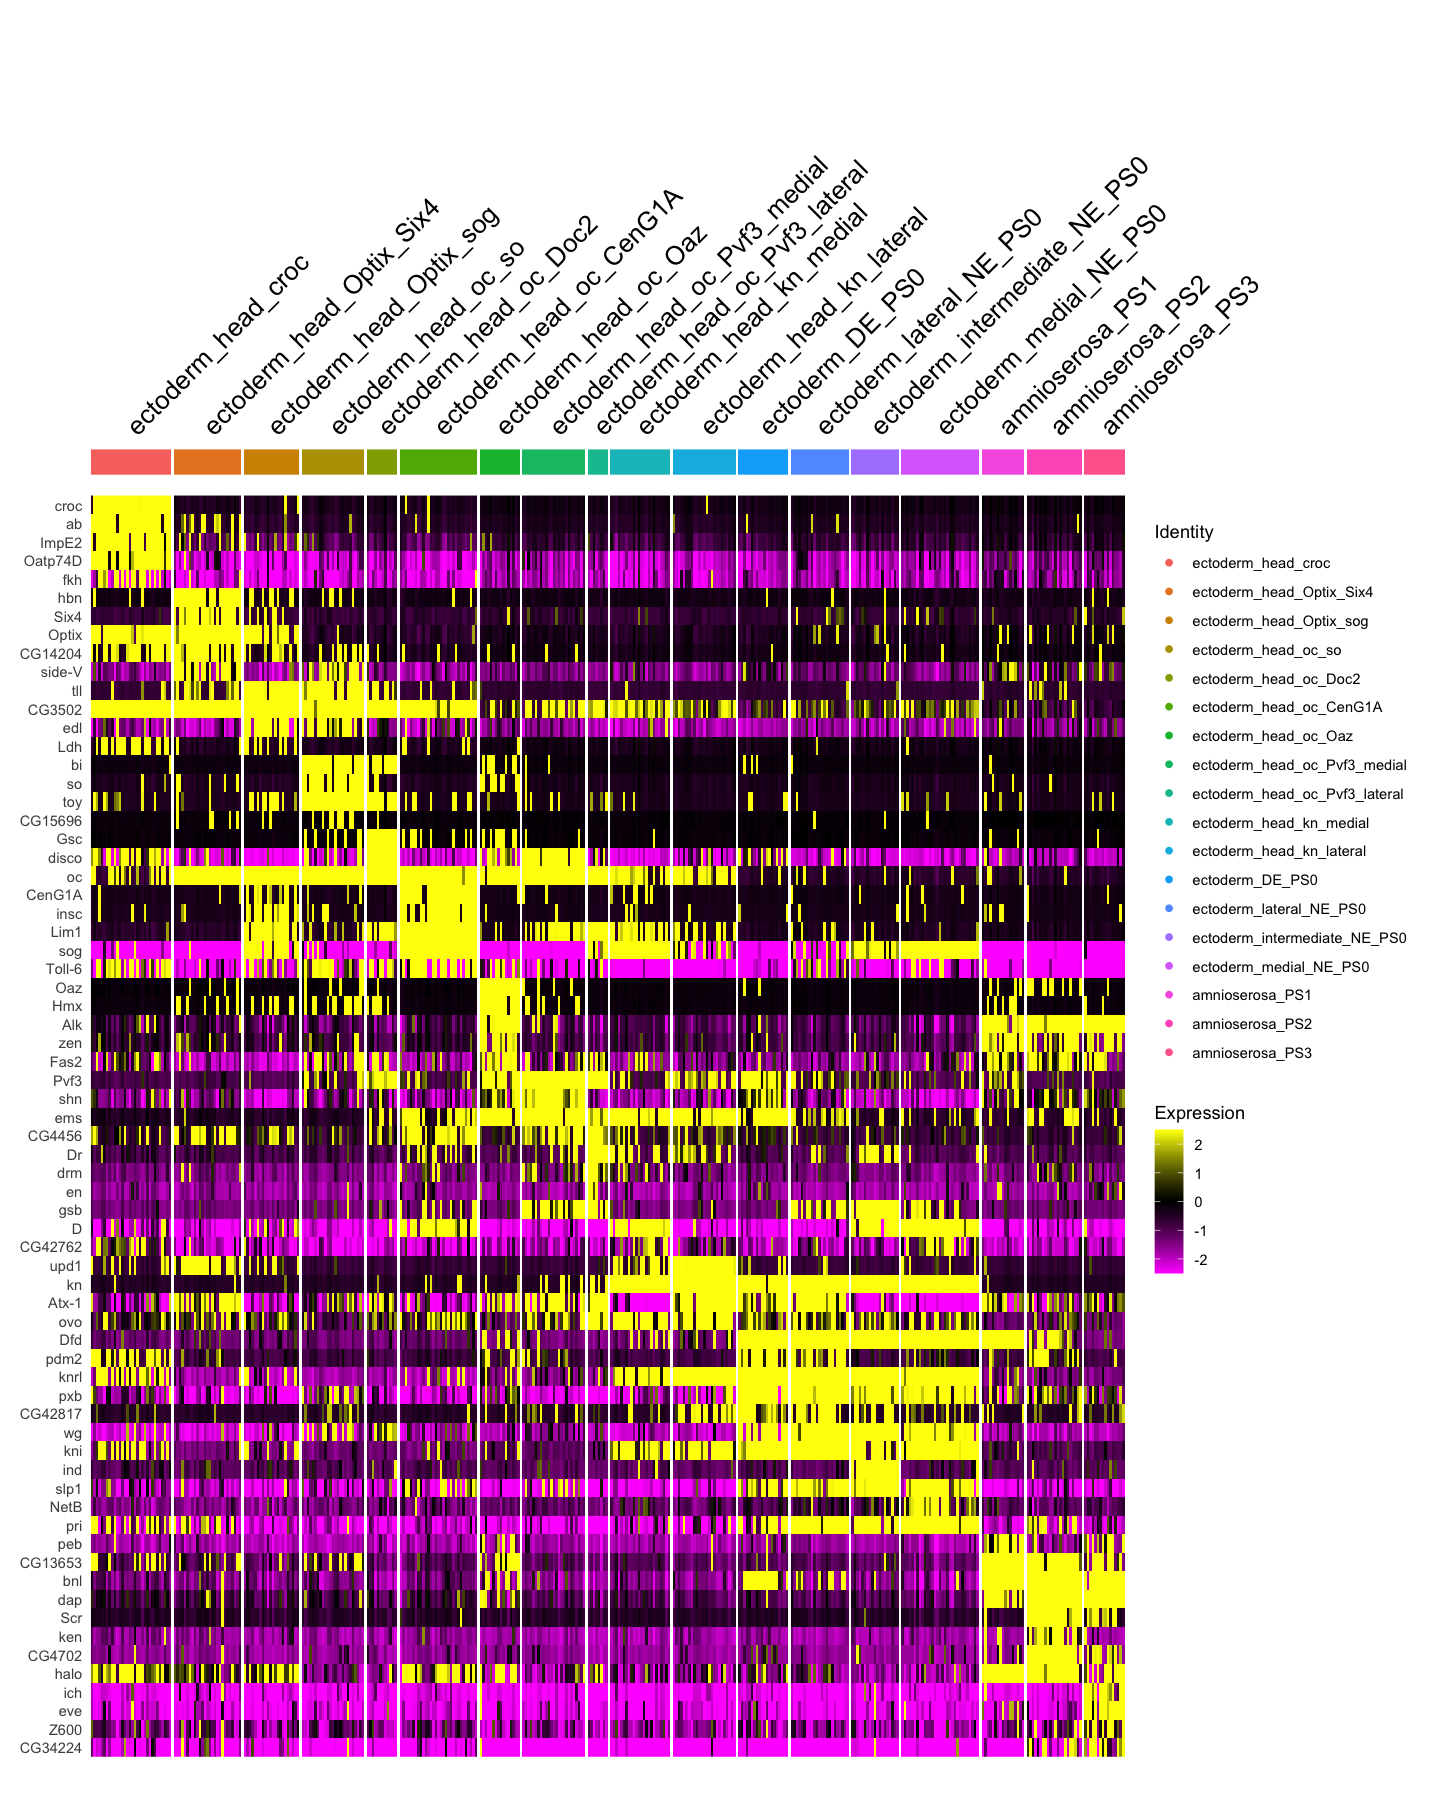

In [27]:
DefaultAssay(seu_HQC_head) <- 'SCT'
options(repr.plot.width=12, repr.plot.height=15)
fig <- DoHeatmap(seu_HQC_head,  features = c(all.markers.top5$gene))
fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_manualID_heatmap_top5.eps", dpi = 300,  width = 12, height = 8)

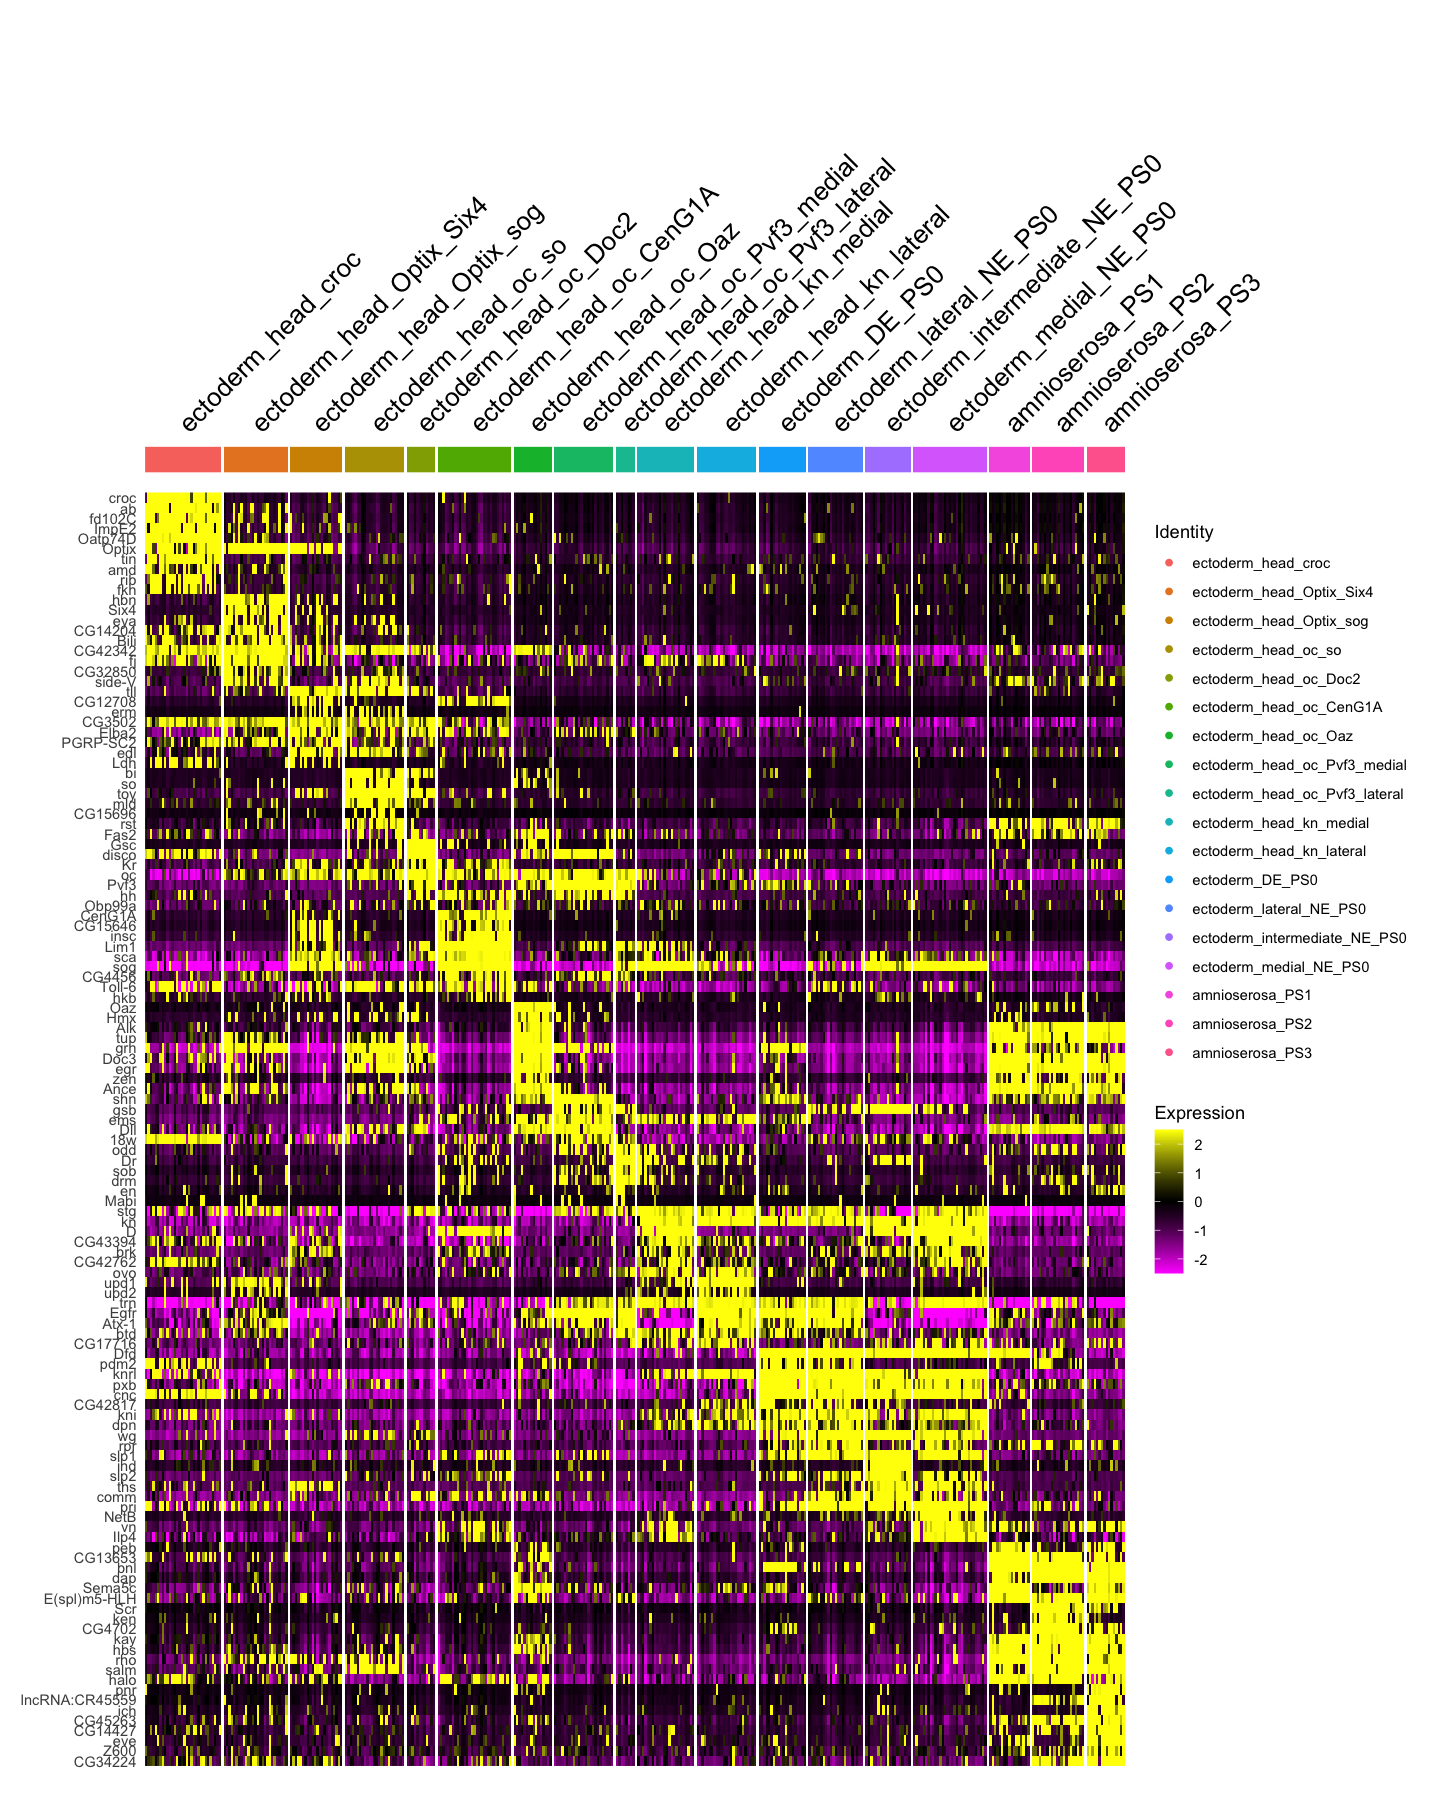

In [28]:
DefaultAssay(seu_HQC_head) <- 'RNA'
seu_renorm <- suppressWarnings(SCTransform(seu_HQC_head, vars.to.regress = c("percent.mt", "percent.rRNA"), verbose = FALSE))

options(repr.plot.width=12, repr.plot.height=15)
fig <- DoHeatmap(seu_renorm,  features = c(all.markers.top10$gene))
fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_manualID_heatmap_renorm.eps", dpi = 300,  width = 12, height = 8)

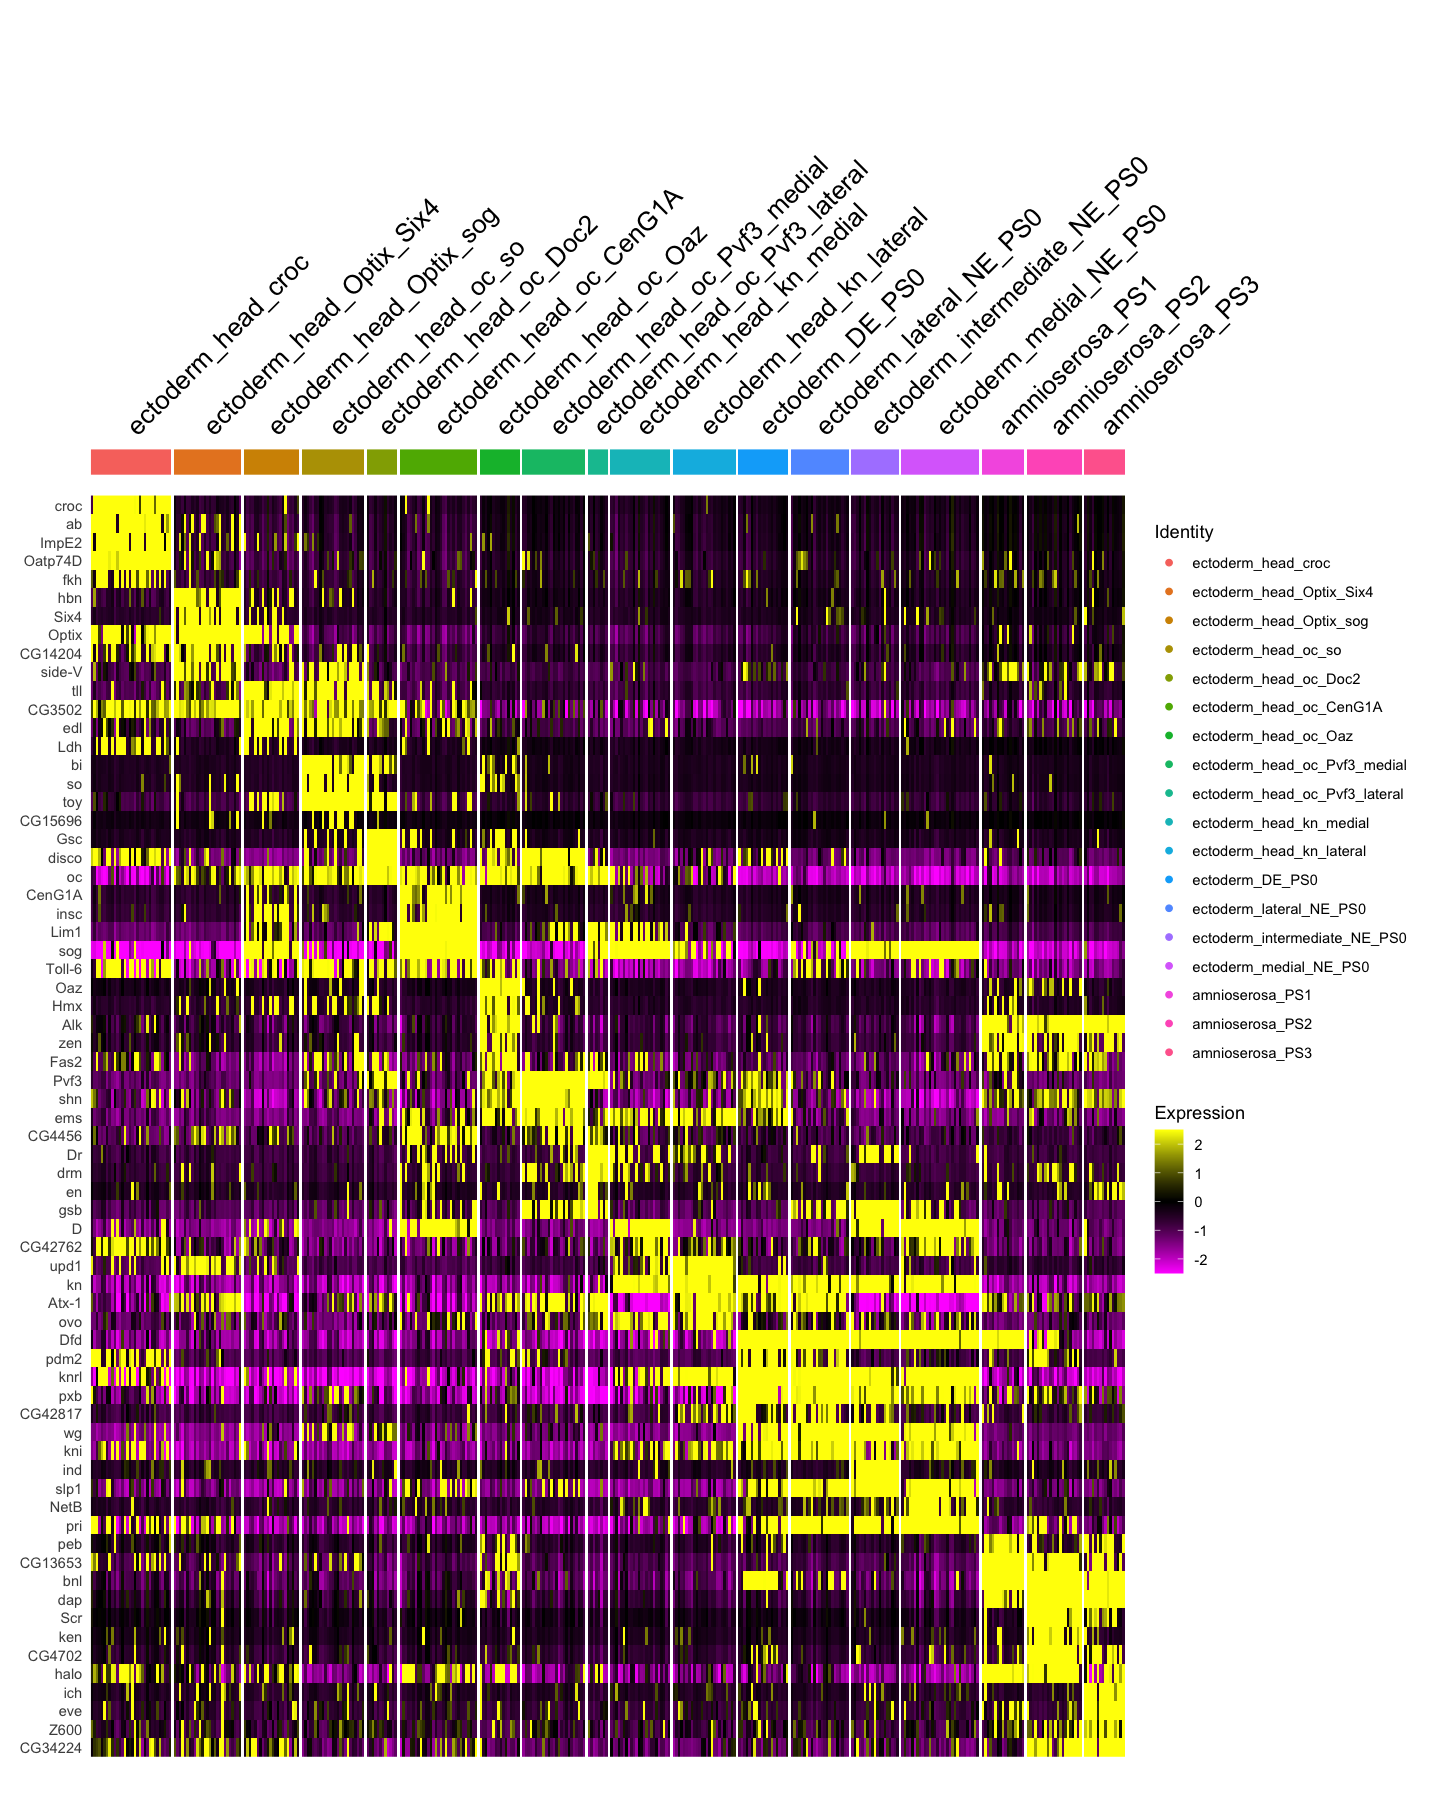

In [29]:
options(repr.plot.width=12, repr.plot.height=15)
fig <- DoHeatmap(seu_renorm,  features = c(all.markers.top5$gene))
fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_manualID_heatmap_renorm_top5.eps", dpi = 300,  width = 12, height = 8)

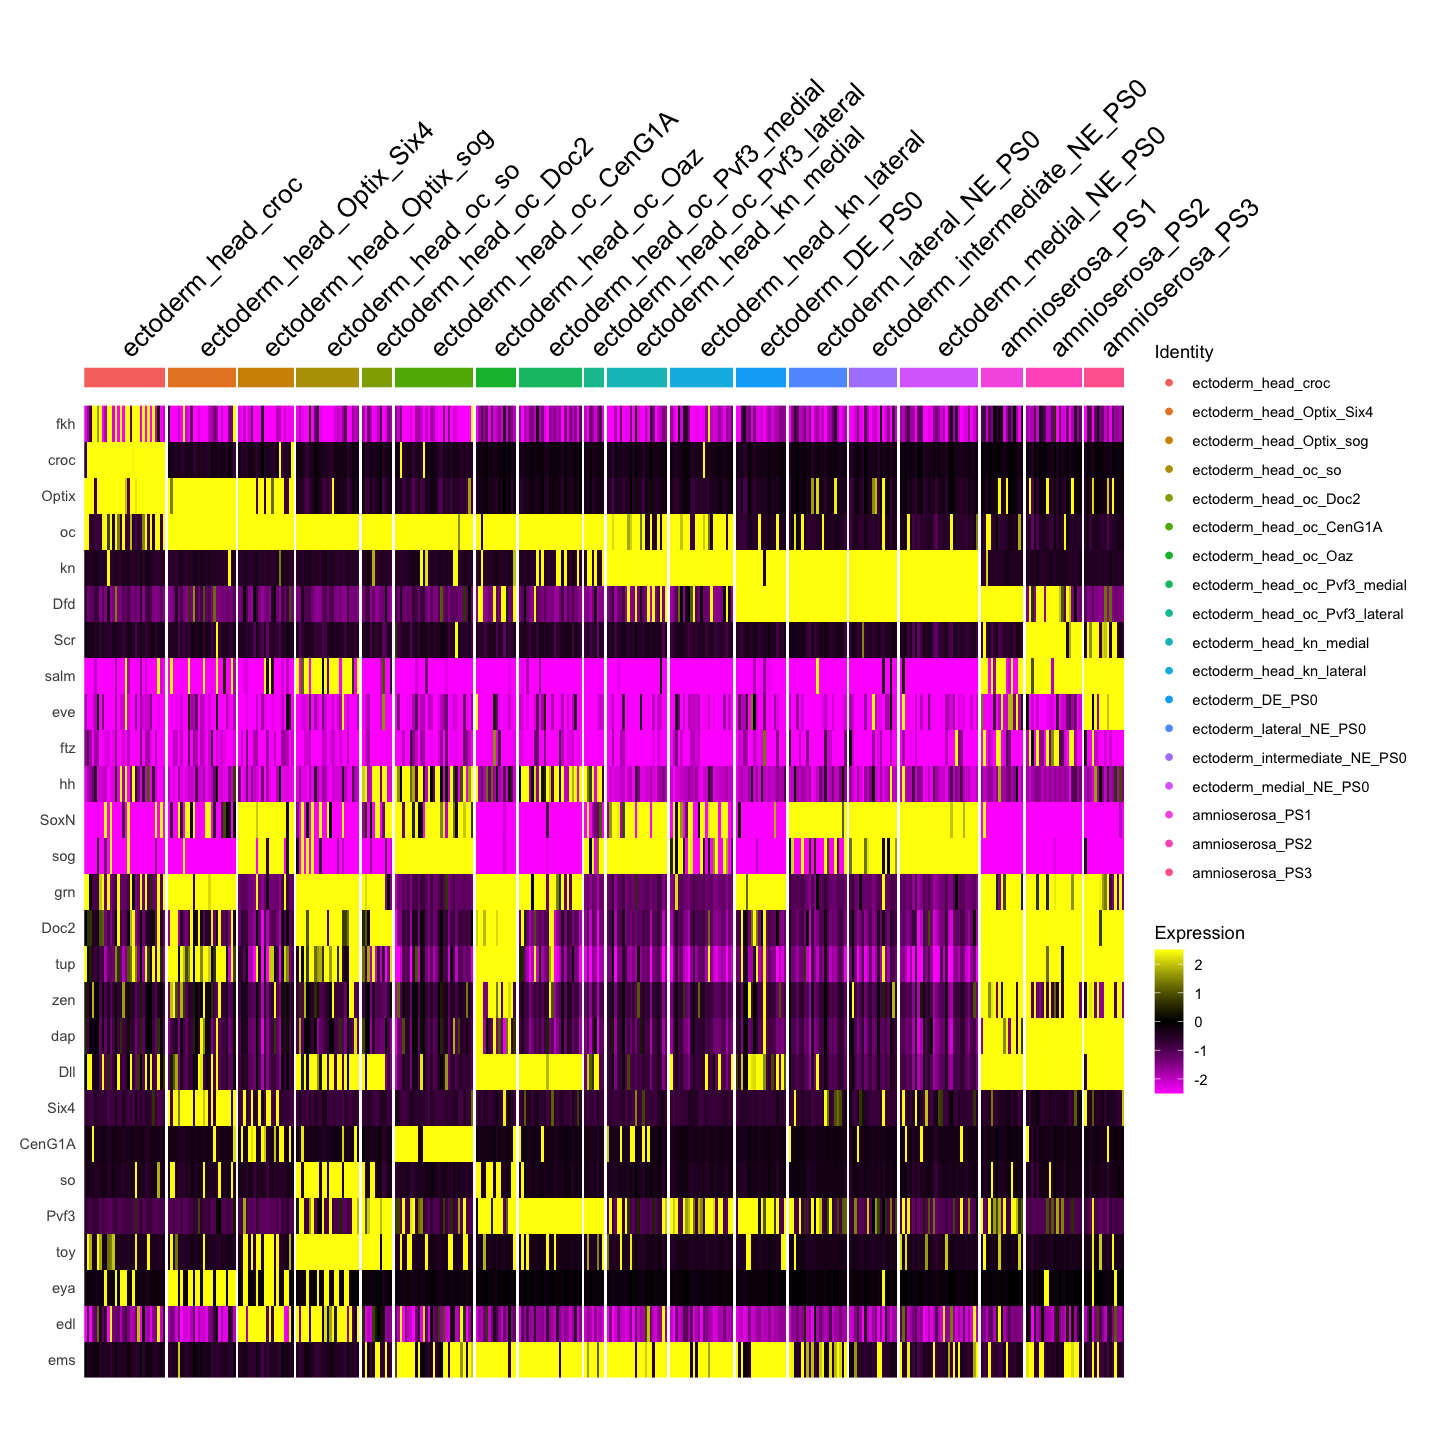

In [30]:
DefaultAssay(seu_HQC_head) <- 'SCT'
features <- c('fkh','croc','Optix','oc','kn','Dfd','Scr','salm','eve','ftz','hh',
              'SoxN','sog','grn','Doc2','tup','zen','dap','Dll',
             'Six4','CenG1A','so','Pvf3','toy','eya','edl','ems')
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu_HQC_head,  features = features)
fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_manualID_heatmap_selected.eps", dpi = 300,  width = 12, height = 8)

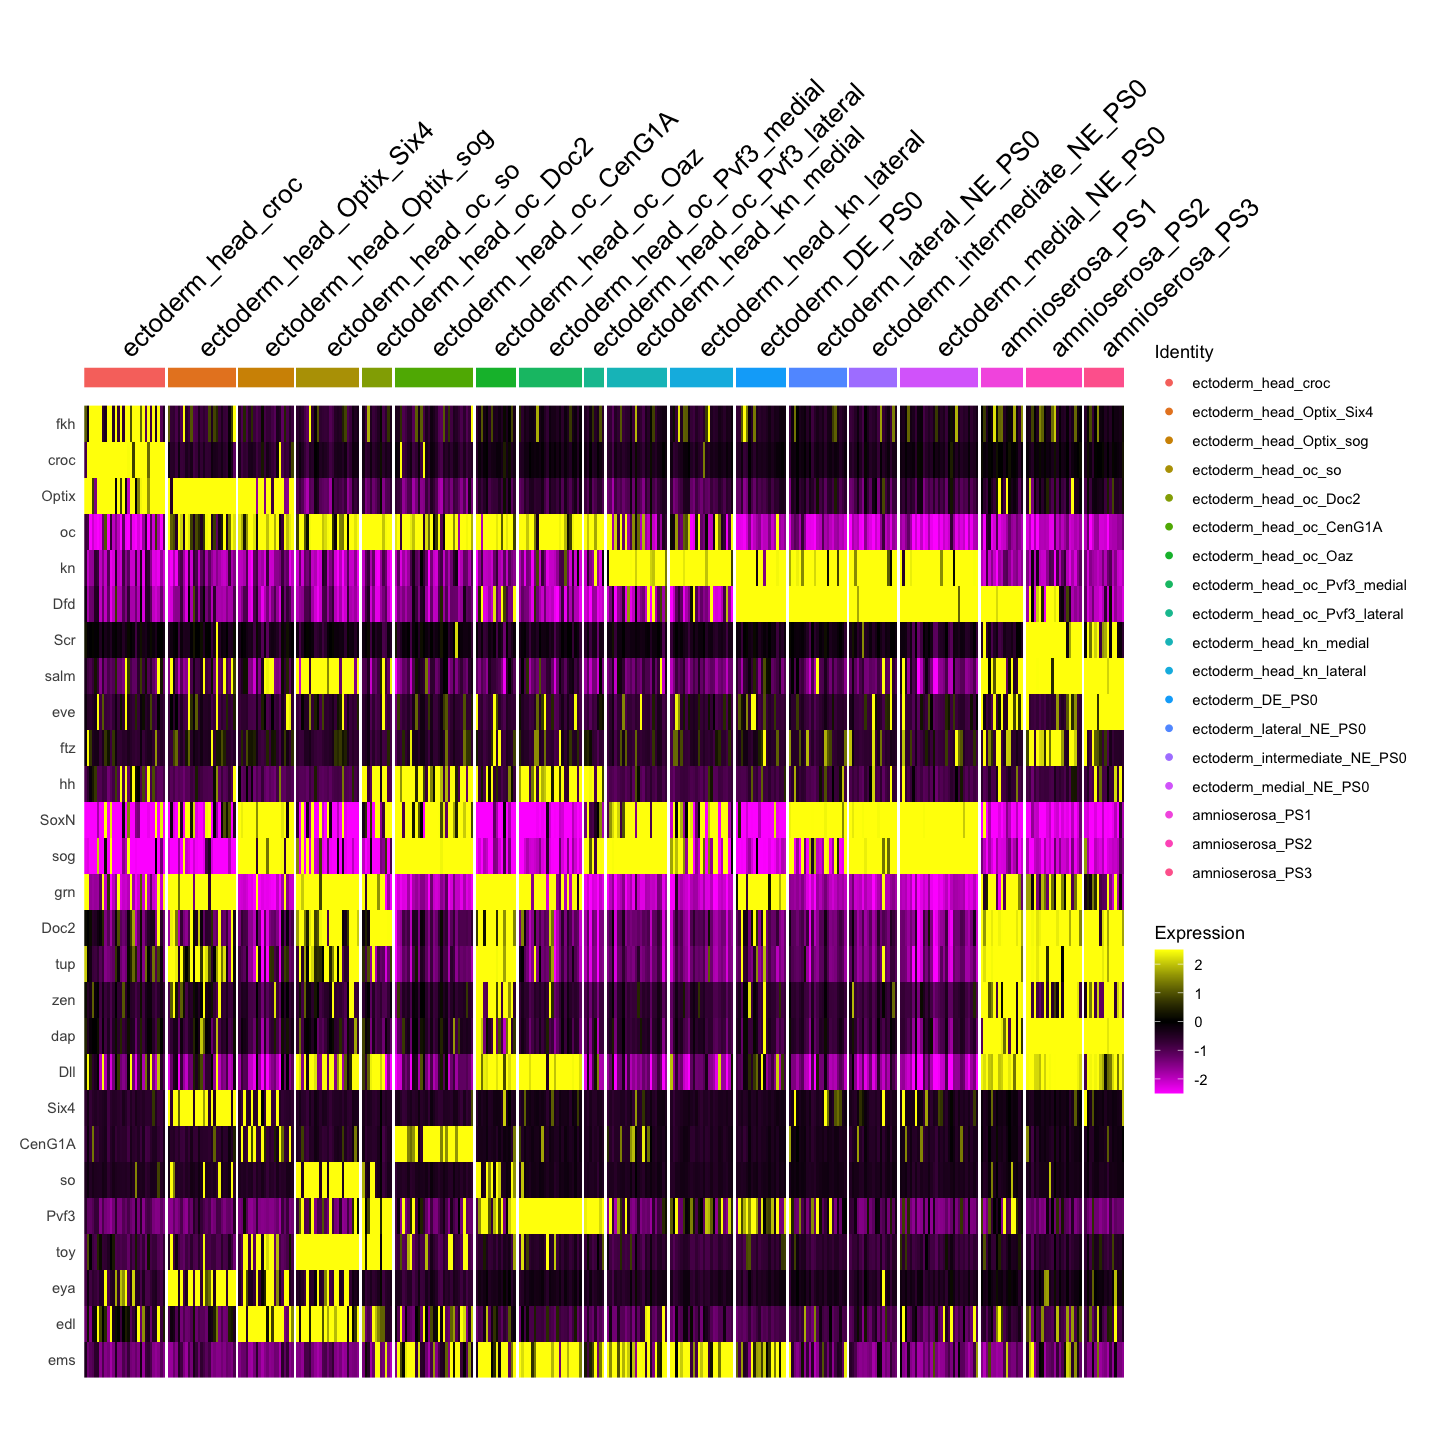

In [31]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu_renorm,  features = features)
fig
ggsave(fig, file = "./figures/05_subclustering_head_manualID/ecto_head_manualID_heatmap_renorm_selected.eps", dpi = 300,  width = 12, height = 8)

In [32]:
seu_HQC_head

An object of class Seurat 
28756 features across 395 samples within 2 assays 
Active assay: SCT (11250 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [33]:
saveRDS(seu_HQC_head, file = '../../data/seurat_object/Set3/subclustering/seu_head_subclustered.obj')

In [34]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv